<a href="https://colab.research.google.com/github/sushma-snk/Real_Estate_Case_Study/blob/main/Real_Estate_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


**Problem Statement**:

A banking institution requires actionable insights from the perspective of Mortgage-Backed Securities, Geographic Business Investment and Real Estate Analysis. 

The objective is to identify white spaces/potential business in the mortgage loan. The mortgage bank would like to identify potential monthly mortgage expenses for each of region based on factors which are primarily monthly family income in a region and rented value of the real estate. Some of the regions are growing rapidly and Competitor banks are selling mortgage loans to subprime customers at a lower interest rate. The bank is strategizing for better market penetration and targeting new customers. A statistical model needs to be created to predict the potential demand in dollars amount of loan for each of the region in the USA. Also, there is a need to create a dashboard which would refresh periodically post data retrieval from the agencies. This would help to monitor the key metrics and trends.

The dashboard must demonstrate relationships and trends for the key metrics as follows:  number of loans, average rental income, monthly mortgage and owner’s cost, family income vs mortgage cost comparison across different regions. The metrics are described not to limit the dashboard to these few only. 


1. Import Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
data_train = pd.read_csv("/gdrive/My Drive/Project_1/train.csv") # Read train data
data_test = pd.read_csv("/gdrive/My Drive/Project_1/test.csv") # Read test data

In [ ]:
data_train.shape

(27321, 80)

In [ ]:
data_test.shape

(11709, 80)

In [ ]:
data_train.info() # Provides number of null values each column has and also datatype of every column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11709 entries, 0 to 11708
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          11709 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     11709 non-null  int64  
 3   COUNTYID                     11709 non-null  int64  
 4   STATEID                      11709 non-null  int64  
 5   state                        11709 non-null  object 
 6   state_ab                     11709 non-null  object 
 7   city                         11709 non-null  object 
 8   place                        11709 non-null  object 
 9   type                         11709 non-null  object 
 10  primary                      11709 non-null  object 
 11  zip_code                     11709 non-null  int64  
 12  area_code                    11709 non-null  int64  
 13  lat             

2. Figure out the primary key and look for the requirement of indexing

Primary Key is the Unique ID (UID) of every Customer. Consider UID for Indexing as every customer has unique value (not repeated)

In [ ]:
data_train.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [ ]:
data_train.set_index(keys=['UID'],inplace=True)
data_test.set_index(keys=['UID'],inplace=True)

In [ ]:
data_train.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
267822,NaN,140,53,36,New York,NY,Hamilton,Hamilton,City,tract,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
246444,NaN,140,141,18,Indiana,IN,South Bend,Roseland,City,tract,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
245683,NaN,140,63,18,Indiana,IN,Danville,Danville,City,tract,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
279653,NaN,140,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
247218,NaN,140,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [ ]:
data_test.head()

,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,primary,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
255504,NaN,140,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,tract,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
252676,NaN,140,1,23,Maine,ME,Auburn,Auburn City,City,tract,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
276314,NaN,140,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,tract,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
248614,NaN,140,231,21,Kentucky,KY,Monticello,Monticello City,City,tract,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
286865,NaN,140,355,48,Texas,TX,Corpus Christi,Edroy,Town,tract,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


Visualize the entire dataset

In [ ]:
for i in range(0, len(data_train.columns), 20):
    print(data_train[data_train.columns[i:i+20]].head())
    print()
    print("_______________________________________________________________________________")
    print()

        BLOCKID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
UID                                                                  
267822      NaN       140        53       36     New York       NY   
246444      NaN       140       141       18      Indiana       IN   
245683      NaN       140        63       18      Indiana       IN   
279653      NaN       140       127       72  Puerto Rico       PR   
247218      NaN       140       161       20       Kansas       KS   

              city           place   type primary  zip_code  area_code  \
UID                                                                      
267822    Hamilton        Hamilton   City   tract     13346        315   
246444  South Bend        Roseland   City   tract     46616        574   
245683    Danville        Danville   City   tract     46122        317   
279653    San Juan        Guaynabo  Urban   tract       927        787   
247218   Manhattan  Manhattan City   City   tract     66502      

In [ ]:
for i in range(0, len(data_test.columns), 20):
    print(data_test[data_test.columns[i:i+20]].head())
    print()
    print("_______________________________________________________________________________")
    print()

        BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
UID                                                                   
255504      NaN       140       163       26      Michigan       MI   
252676      NaN       140         1       23         Maine       ME   
276314      NaN       140        15       42  Pennsylvania       PA   
248614      NaN       140       231       21      Kentucky       KY   
286865      NaN       140       355       48         Texas       TX   

                  city                  place     type primary  zip_code  \
UID                                                                        
255504         Detroit  Dearborn Heights City      CDP   tract     48239   
252676          Auburn            Auburn City     City   tract      4210   
276314       Pine City              Millerton  Borough   tract     14871   
248614      Monticello        Monticello City     City   tract     42633   
286865  Corpus Christi                  Edroy 

In [ ]:
for i in data_train:
  print(i)
  print(data_train[i].nunique())
  print('-----------')

BLOCKID
0
-----------
SUMLEVEL
1
-----------
COUNTYID
296
-----------
STATEID
52
-----------
state
52
-----------
state_ab
52
-----------
city
6916
-----------
place
9912
-----------
type
6
-----------
primary
1
-----------
zip_code
12744
-----------
area_code
274
-----------
lat
27158
-----------
lng
27160
-----------
ALand
27131
-----------
AWater
16488
-----------
pop
7648
-----------
male_pop
4507
-----------
female_pop
4606
-----------
rent_mean
26806
-----------
rent_median
2335
-----------
rent_stdev
26792
-----------
rent_sample_weight
26693
-----------
rent_samples
2178
-----------
rent_gt_10
8373
-----------
rent_gt_15
13983
-----------
rent_gt_20
16650
-----------
rent_gt_25
17592
-----------
rent_gt_30
17828
-----------
rent_gt_35
17619
-----------
rent_gt_40
17320
-----------
rent_gt_50
16540
-----------
universe_samples
2200
-----------
used_samples
2124
-----------
hi_mean
26938
-----------
hi_median
23111
-----------
hi_stdev
26934
-----------
hi_sample_weight
26941
---

In [ ]:
for i in data_test:
  print(i)
  print(data_test[i].nunique())
  print('-----------')

BLOCKID
0
-----------
SUMLEVEL
1
-----------
COUNTYID
246
-----------
STATEID
52
-----------
state
52
-----------
state_ab
52
-----------
city
4369
-----------
place
5902
-----------
type
6
-----------
primary
1
-----------
zip_code
7788
-----------
area_code
268
-----------
lat
11676
-----------
lng
11677
-----------
ALand
11677
-----------
AWater
7026
-----------
pop
5692
-----------
male_pop
3663
-----------
female_pop
3770
-----------
rent_mean
11499
-----------
rent_median
1930
-----------
rent_stdev
11494
-----------
rent_sample_weight
11495
-----------
rent_samples
1838
-----------
rent_gt_10
5038
-----------
rent_gt_15
7715
-----------
rent_gt_20
8756
-----------
rent_gt_25
9156
-----------
rent_gt_30
9200
-----------
rent_gt_35
9212
-----------
rent_gt_40
9105
-----------
rent_gt_50
8749
-----------
universe_samples
1857
-----------
used_samples
1805
-----------
hi_mean
11559
-----------
hi_median
10768
-----------
hi_stdev
11556
-----------
hi_sample_weight
11562
-----------


"BLOCKID" Columns contains only NULL values.
"SUMLEVEL" and "primary" columns contains only 1 value throughout the dataset which means no variance.
Hence, lets remove these three columns in both test and train data.

In [ ]:
data_train = data_train.drop(['BLOCKID', 'SUMLEVEL', 'primary'], axis=1, inplace=False) # Drop columns - BLOCKID, SUMLEVEL and primary

In [ ]:
data_test = data_test.drop(['BLOCKID', 'SUMLEVEL', 'primary'], axis=1, inplace=False) # Drop columns - BLOCKID, SUMLEVEL and primary

3. Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

How to deal with missing values?

Lets check what is the percentage of missing values in the entire dataset.

In [ ]:
missing_data_train = data_train[data_train.isnull().any(axis=1)]
missing_data_train

,COUNTYID,STATEID,state,state_ab,city,place,type,zip_code,area_code,lat,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
223593,19,4,Arizona,AZ,Tucson,Littletown,CDP,85734,520,32.067721,...,40.02370,40.83333,8.49563,30.01695,161.0,NaN,0.16308,0.16308,0.02634,0.20499
233040,101,8,Colorado,CO,Pueblo,Pueblo City,City,81001,719,38.308407,...,20.00784,19.25000,4.30291,172.56153,309.0,0.00000,0.00000,0.00000,0.00000,0.00000
263292,13,34,New Jersey,NJ,Newark,Silver Lake,City,7107,973,40.773830,...,35.47667,35.58333,20.62717,369.61740,1671.0,0.24002,0.37411,0.05579,0.02504,0.07654
267158,47,36,New York,NY,Brooklyn,New York City,City,11215,718,40.659126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292484,25,55,Wisconsin,WI,Madison,Madison City,City,53703,608,43.073403,...,22.03226,21.08333,5.13435,1365.86300,1981.0,0.00000,0.00773,0.00000,0.00000,0.01160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266321,5,36,New York,NY,Bronx,Mount Vernon City,City,10458,718,40.874095,...,37.43584,36.66667,20.24009,949.65719,3921.0,0.07254,0.42468,0.07456,0.03217,0.08100
235725,57,12,Florida,FL,Tampa,Pebble Creek,City,33647,813,28.149447,...,29.08800,28.08333,14.65116,144.78344,648.0,0.00000,0.25806,0.10753,0.10753,0.09946
247777,61,21,Kentucky,KY,Brownsville,Brownsville City,City,42210,270,37.197158,...,19.39847,19.00000,1.49474,3.39130,6.0,NaN,0.00000,0.00000,0.00000,0.00000


In [ ]:
missing_data_test = data_test[data_test.isnull().any(axis=1)]
missing_data_test

,COUNTYID,STATEID,state,state_ab,city,place,type,zip_code,area_code,lat,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
UID,,,,,,,,,,,,,,,,,,,,,
265339,3,32,Nevada,NV,Las Vegas,Winchester,City,89119,702,36.111448,...,33.57247,32.50000,17.36519,49.31407,234.0,0.00000,0.22857,0.11020,0.06122,0.26327
287596,451,48,Texas,TX,San Angelo,San Angelo City,Town,76903,325,31.431831,...,21.40298,20.50000,7.28394,456.32778,868.0,0.00000,0.22232,0.17475,0.01052,0.00000
250903,25,25,Massachusetts,MA,Cambridge,Cambridge City,City,2139,617,42.359478,...,22.53871,20.75000,7.40442,2069.57453,3716.0,0.02169,0.10879,0.05440,0.00204,0.00409
287557,441,48,Texas,TX,Abilene,Tye City,Town,79607,325,32.423876,...,22.72458,23.16667,2.18207,26.71180,59.0,0.60000,0.01984,0.00933,0.00000,0.02217
247510,209,20,Kansas,KS,Kansas City,Kansas City City,City,66104,913,39.171767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267675,47,36,New York,NY,Brooklyn,New York City,City,11212,718,40.670130,...,37.65214,37.00000,20.92169,698.63402,2546.0,0.02453,0.29500,0.04282,0.02776,0.03013
288512,35,49,Utah,UT,Salt Lake City,Salt Lake City City,City,84116,801,40.788810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275715,3,42,Pennsylvania,PA,Pittsburgh,Pittsburgh City,Borough,15219,412,40.441658,...,40.70590,36.83333,24.23393,56.65460,177.0,0.08257,0.00000,0.00000,0.00000,0.13333


Find the columns with missing values.

Replace the missing values with mean.

In [ ]:
missing_data_train_cols=[]
for col in data_train.columns:
    if data_train[col].isna().sum() != 0:
         missing_data_train_cols.append(col)
print(missing_data_train_cols)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [ ]:

missing_data_test_cols=[]
for col in data_test.columns:
    if data_test[col].isna().sum() != 0:
        missing_data_test_cols.append(col)
print(missing_data_test_cols)

['rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50', 'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median', 'family_stdev', 'family_sample_weight', 'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight', 'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt', 'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree', 'hs_degree_male', 'hs_degree_female', 'male_age_mean', 'male_age_median', 'male_age_stdev', 'male_age_sample_weight', 'male_age_samples', 'female_age_mean', 'female_age_median', 'female_age_stdev', 'female_age_sample_weight', 'female_age_samples', 'pct_own', 'married', 'married_snp', 'separated', 'divorced']


In [ ]:
for i in missing_data_train_cols:
  print(i,'-',data_train[i].dtypes)

rent_mean - float64
rent_median - float64
rent_stdev - float64
rent_sample_weight - float64
rent_samples - float64
rent_gt_10 - float64
rent_gt_15 - float64
rent_gt_20 - float64
rent_gt_25 - float64
rent_gt_30 - float64
rent_gt_35 - float64
rent_gt_40 - float64
rent_gt_50 - float64
hi_mean - float64
hi_median - float64
hi_stdev - float64
hi_sample_weight - float64
hi_samples - float64
family_mean - float64
family_median - float64
family_stdev - float64
family_sample_weight - float64
family_samples - float64
hc_mortgage_mean - float64
hc_mortgage_median - float64
hc_mortgage_stdev - float64
hc_mortgage_sample_weight - float64
hc_mortgage_samples - float64
hc_mean - float64
hc_median - float64
hc_stdev - float64
hc_samples - float64
hc_sample_weight - float64
home_equity_second_mortgage - float64
second_mortgage - float64
home_equity - float64
debt - float64
second_mortgage_cdf - float64
home_equity_cdf - float64
debt_cdf - float64
hs_degree - float64
hs_degree_male - float64
hs_degree_f

In [ ]:
for i in missing_data_test_cols:
  print(i,'-',data_test[i].dtypes)

rent_mean - float64
rent_median - float64
rent_stdev - float64
rent_sample_weight - float64
rent_samples - float64
rent_gt_10 - float64
rent_gt_15 - float64
rent_gt_20 - float64
rent_gt_25 - float64
rent_gt_30 - float64
rent_gt_35 - float64
rent_gt_40 - float64
rent_gt_50 - float64
hi_mean - float64
hi_median - float64
hi_stdev - float64
hi_sample_weight - float64
hi_samples - float64
family_mean - float64
family_median - float64
family_stdev - float64
family_sample_weight - float64
family_samples - float64
hc_mortgage_mean - float64
hc_mortgage_median - float64
hc_mortgage_stdev - float64
hc_mortgage_sample_weight - float64
hc_mortgage_samples - float64
hc_mean - float64
hc_median - float64
hc_stdev - float64
hc_samples - float64
hc_sample_weight - float64
home_equity_second_mortgage - float64
second_mortgage - float64
home_equity - float64
debt - float64
second_mortgage_cdf - float64
home_equity_cdf - float64
debt_cdf - float64
hs_degree - float64
hs_degree_male - float64
hs_degree_f

Columns with missing values are all numeric, so replace NaN with mean.

In [ ]:
for col in data_train.columns:
    if col in (missing_data_train_cols):
        data_train[col].replace(np.nan, data_train[col].mean(),inplace=True)

In [ ]:
data_train.isna().sum().sum()

0

In [ ]:
for col in data_test.columns:
    if col in (missing_data_test_cols):
        data_test[col].replace(np.nan, data_test[col].mean(),inplace=True)

In [ ]:
data_test.isna().sum().sum()

0

4. Understanding homeowner costs are incredibly valuable because it is positively correlated to consumer spending which drives the economy through disposable income. Perform debt analysis. You may want to follow the following steps:

Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10%. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to roughly 50%.

In [ ]:
! pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=5aeab7edfe6f98acaf5a9a61a265946eaa1326dc8f38a00c3d16bc05ec7f5310
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [ ]:
from pandasql import sqldf # write a query statement to find top 2500 locations with percent_ownership > 0.1 and second mortgage < 0.5. Consider the columns - place, lat and lng as they represent location.
query1 = "select place,pct_own,second_mortgage,lat,lng from data_train where pct_own >0.10 and second_mortgage <0.5 order by second_mortgage DESC LIMIT 2500;"
pysqldf = lambda q: sqldf(q, globals())
data_train_location_mort_pct=pysqldf(query1)

In [ ]:
data_train_location_mort_pct

,place,pct_own,second_mortgage,lat,lng
0,Worcester City,0.20247,0.43363,42.254262,-71.800347
1,Harbor Hills,0.15618,0.31818,40.751809,-73.853582
2,Glen Burnie,0.22380,0.30212,39.127273,-76.635265
3,Egypt Lake-leto,0.11618,0.28972,28.029063,-82.495395
4,Lincolnwood,0.14228,0.28899,41.967289,-87.652434
...,...,...,...,...,...
2495,Marina Del Rey,0.44682,0.06818,33.983204,-118.466139
2496,Raleigh City,0.12827,0.06818,35.757135,-78.704288
2497,Lochearn,0.84707,0.06815,39.353095,-76.733315
2498,Manteca City,0.67116,0.06814,37.732143,-121.242902


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=go.Scattergeo(
    lat = data_train_location_mort_pct['lat'],
    lon = data_train_location_mort_pct['lng']),
    )
fig.update_layout(
    geo=dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation_lon = -100
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title='Top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 %')
fig.show()

Bad debt is the debt you should avoid at all costs such as a second mortgage or home equity loan. Conversely, Good debt is all other debt not including second mortgage or home equity loan.

Bad Debt Equation:

Bad Debt = P (Second Mortgage ∩ Home Equity Loan)

Bad Debt = second_mortgage + home_equity - home_equity_second_mortgage

In [ ]:
data_train['bad_debt']=data_train['second_mortgage']+data_train['home_equity']-data_train['home_equity_second_mortgage']

Create pie charts (Venn diagram) to show overall debt (% bad and good debt) and bad debt (2 mortgage and home equity loan).

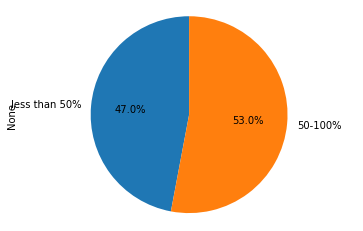

In [ ]:

data_train['bins'] = pd.cut(data_train['bad_debt'],bins=[0,0.10,1], labels=["less than 50%","50-100%"])
data_train.groupby(['bins']).size().plot(kind='pie',subplots=True,startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt and bad debt for different cities.

In [ ]:
# Write a query to select cities from top 2500 locations' condition
query2 = "select city,second_mortgage,home_equity,debt,bad_debt from data_train where pct_own >0.10 and second_mortgage <0.5 order by second_mortgage DESC LIMIT 2500;"
pysqldf = lambda q: sqldf(q, globals())
data_train_city_mort_pct=pysqldf(query2)

In [ ]:
cities = list(data_train_city_mort_pct['city'].value_counts()[:20].index)
print(cities)

['Chicago', 'Los Angeles', 'Washington', 'Brooklyn', 'Aurora', 'Milwaukee', 'Jacksonville', 'Denver', 'Charlotte', 'Las Vegas', 'Minneapolis', 'Colorado Springs', 'Sacramento', 'Long Beach', 'Baltimore', 'Columbus', 'Cincinnati', 'Lowell', 'New Orleans', 'San Jose']


In [ ]:
boxplot_data = data_train_city_mort_pct[data_train_city_mort_pct['city'].isin (cities)]

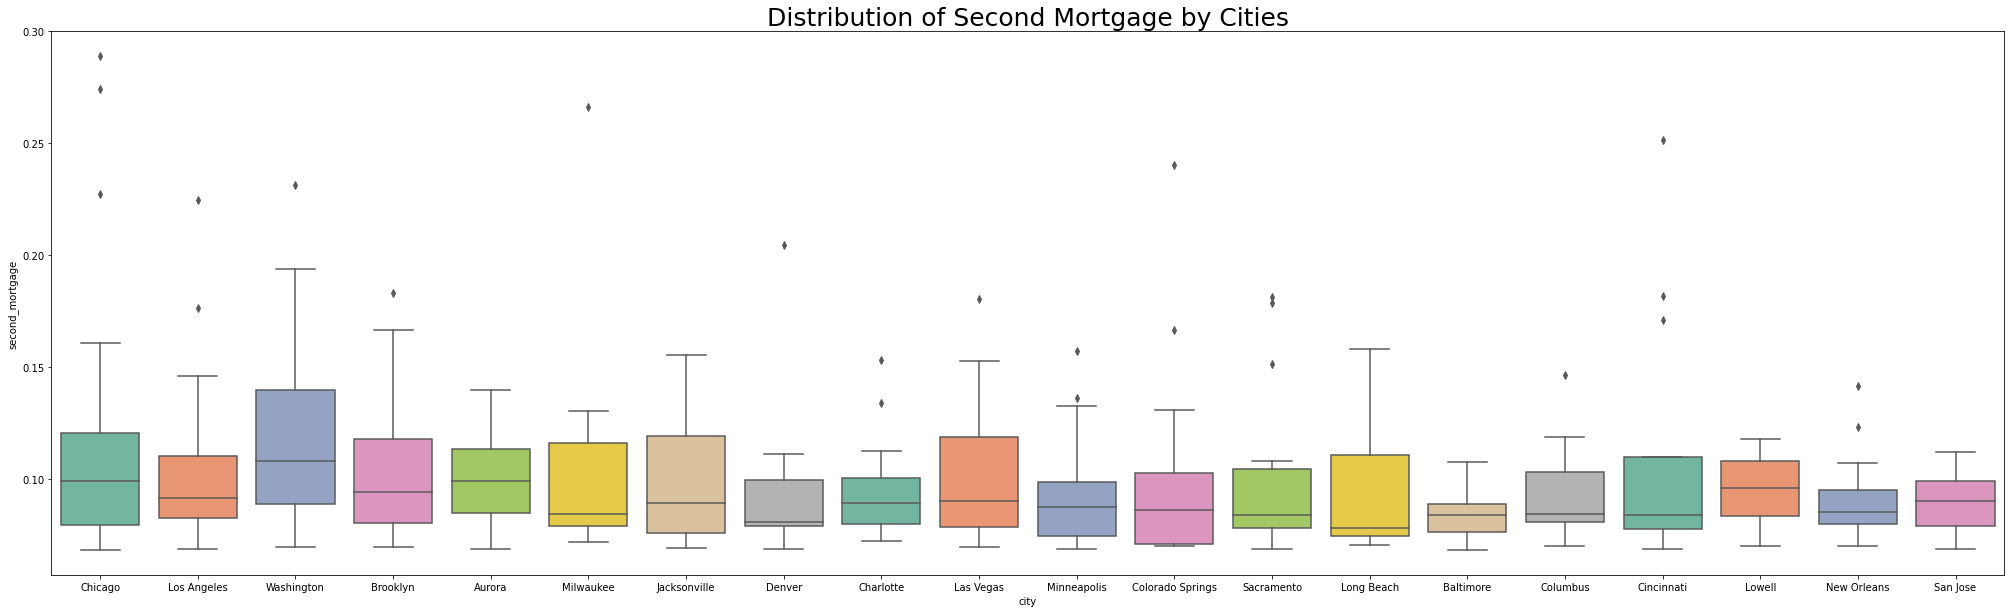

In [ ]:
plt.figure(figsize = (35, 10))
sns.boxplot(x='city',y='second_mortgage',data=boxplot_data,palette='Set2',
            order = cities).set_title('Distribution of Second Mortgage by Cities',
            fontsize = 25)
plt.show()

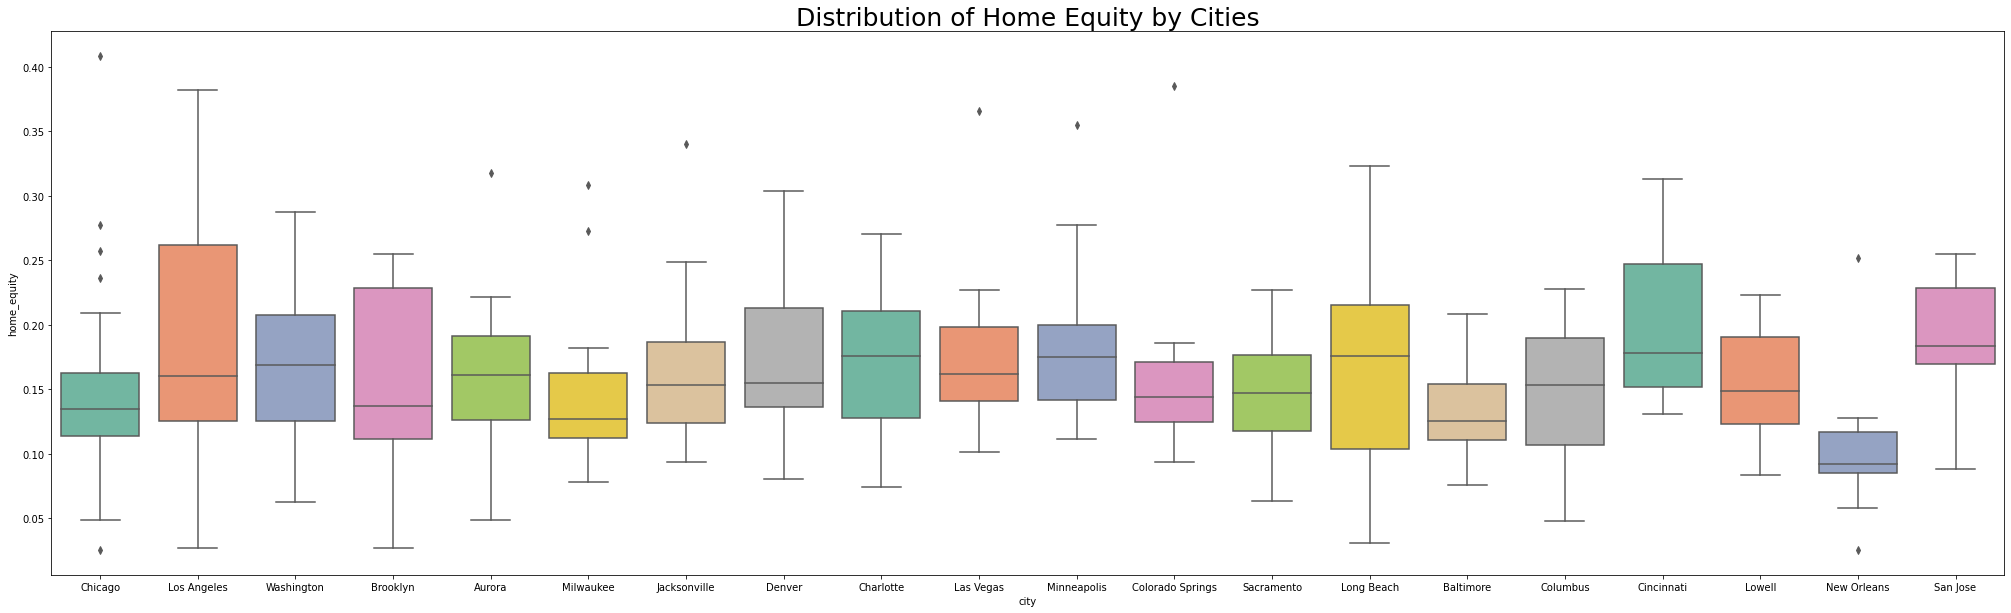

In [ ]:
plt.figure(figsize = (35, 10))
sns.boxplot(x='city',y='home_equity',data=boxplot_data,palette='Set2',
            order = cities).set_title('Distribution of Home Equity by Cities',
            fontsize = 25)
plt.show()

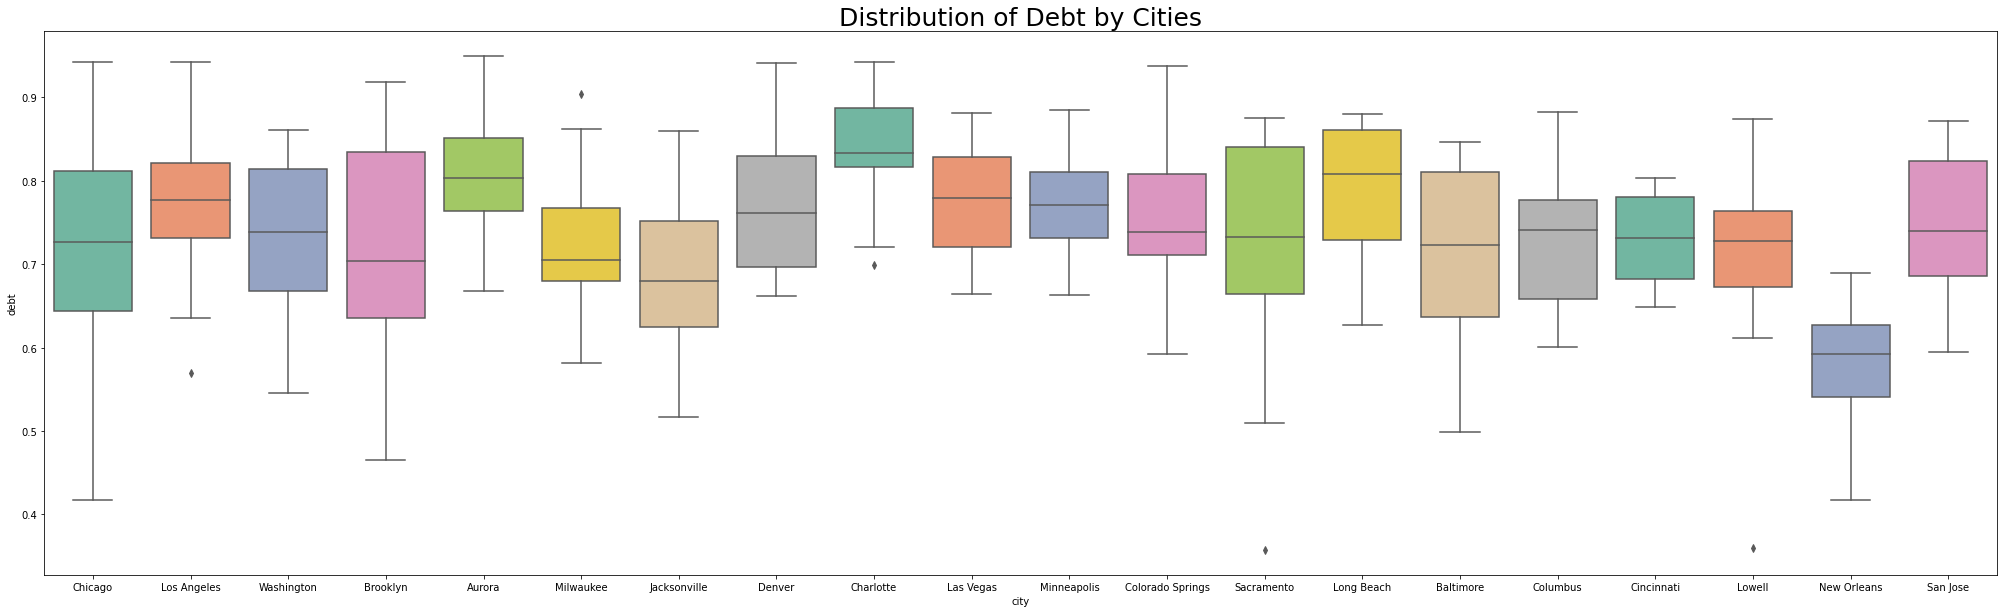

In [ ]:
plt.figure(figsize = (35, 10))
sns.boxplot(x='city',y='debt',data=boxplot_data,palette='Set2',
            order = cities).set_title('Distribution of Debt by Cities',
            fontsize = 25)
plt.show()

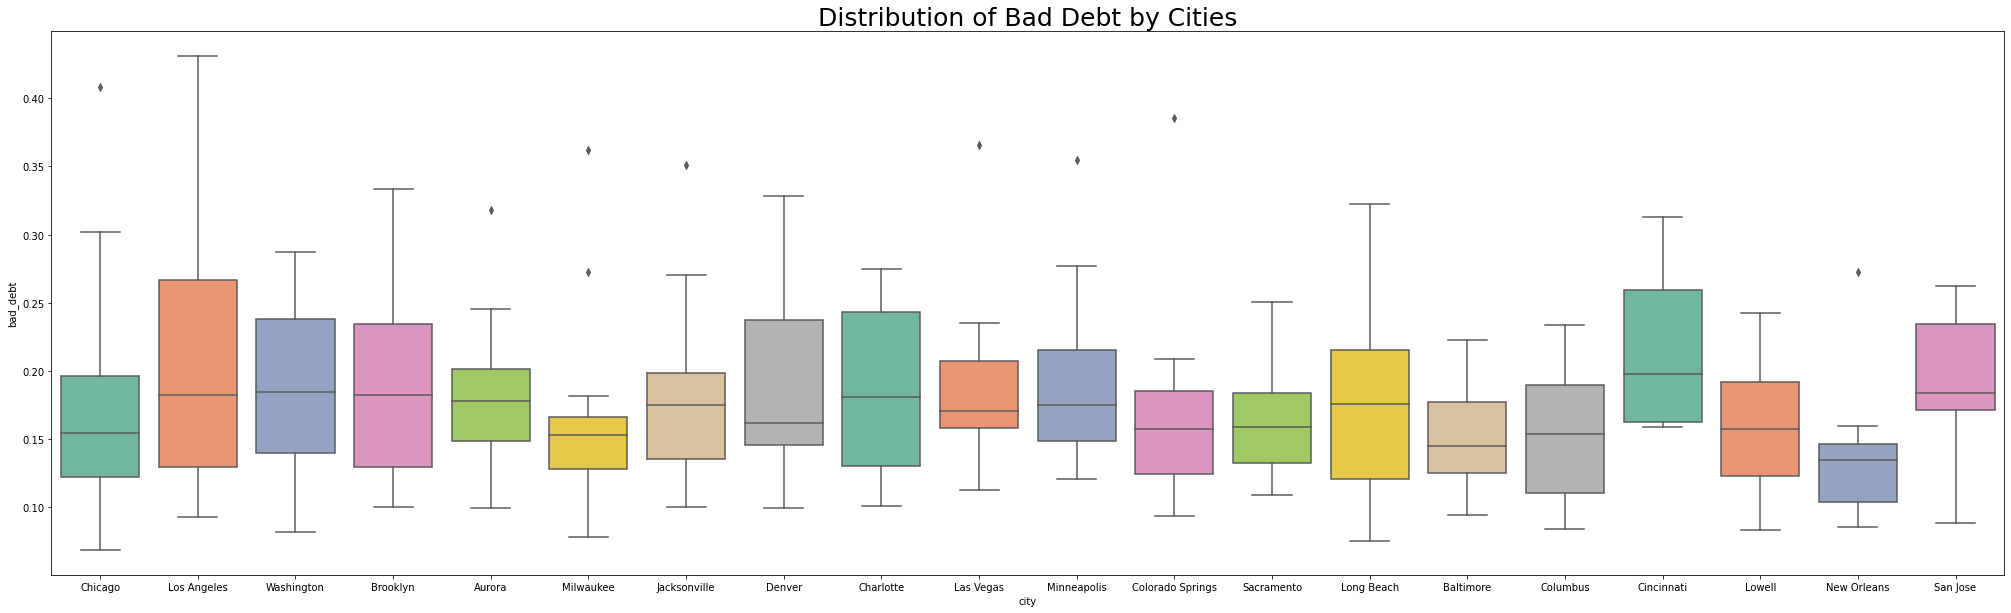

In [ ]:
plt.figure(figsize = (35, 10))
sns.boxplot(x='city',y='bad_debt',data=boxplot_data,palette='Set2',
            order = cities).set_title('Distribution of Bad Debt by Cities',
            fontsize = 25)
plt.show()

Create a collated income distribution chart for family income, house hold income and remaining income.

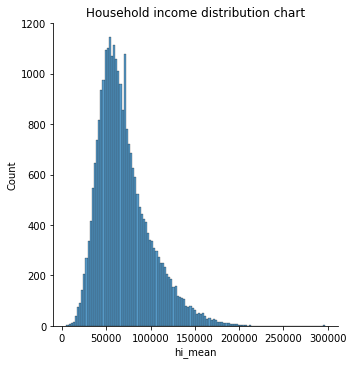

In [ ]:
sns.displot(data_train['hi_mean'])
plt.title('Household income distribution chart')
plt.show()

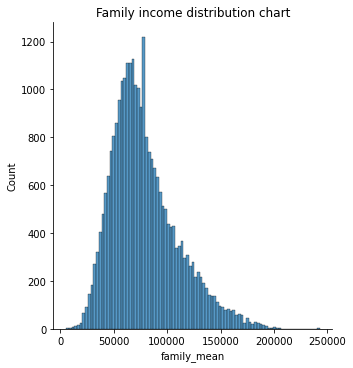

In [ ]:
sns.displot(data_train['family_mean'])
plt.title('Family income distribution chart')
plt.show()

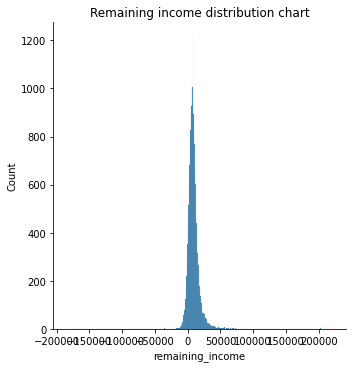

In [ ]:
data_train['remaining_income'] = data_train['family_mean']-data_train['hi_mean']
sns.displot(data_train['remaining_income'])
plt.title('Remaining income distribution chart')
plt.show()

Remaining income is distributed normally around its mean.

5. Perform EDA and come out with insights into population density and age. You may require deriving new fields (Make sure to weight averages for accurate measurements):

Population density (hint-use ‘pop’ and ‘Aland’ to calculate)

Population Density = Number of People / Land Area

Here, Number of People --> 'pop', Land Area = 'Aland'

In [ ]:
data_train['population_density'] = data_train['pop'] / data_train['ALand']

In [ ]:
data_test['population_density'] = data_test['pop'] / data_test['ALand']

Visualize the findings using appropriate chart type.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



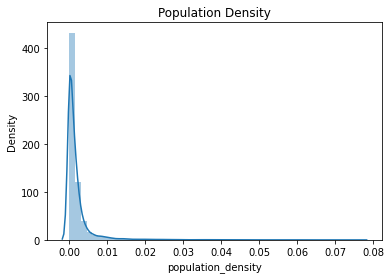

In [ ]:
# Visualization of population density of train data
sns.distplot(data_train['population_density'])
plt.title('Population Density')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



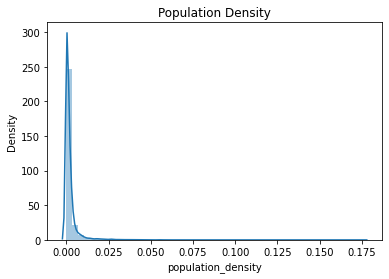

In [ ]:
# Visualization of population density of test data
sns.distplot(data_test['population_density'])
plt.title('Population Density')
plt.show()

median age (hint-use the variables ‘male_age_median’, ‘female_age_median’, ‘male_pop’, ‘female_pop’)

Median Age = sum(male_median_age, female_median_age)/total_population

Median Age = ((male_age_median * male_pop) + (female_age_median * female_pop)) / pop

In [ ]:
data_train['median_age'] = ((data_train['male_age_median'] * data_train['male_pop']) + (data_train['female_age_median'] * data_train['female_pop'])) / data_train['pop']
data_test['median_age'] = ((data_test['male_age_median'] * data_test['male_pop']) + (data_test['female_age_median'] * data_test['female_pop'])) / data_test['pop']

Visualize the findings using appropriate chart type.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



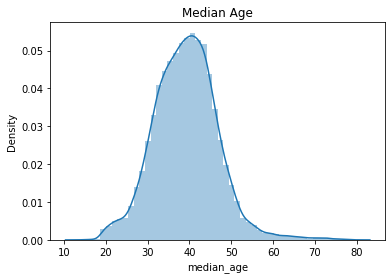

In [ ]:
# Visualization of median age of train data
sns.distplot(data_train['median_age'])
plt.title('Median Age')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



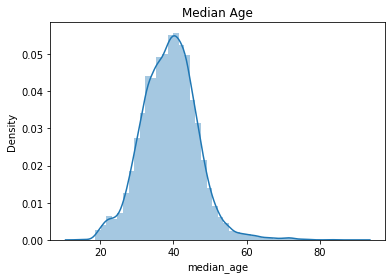

In [ ]:
# Visualization of median age of test data
sns.distplot(data_test['median_age'])
plt.title('Median Age')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



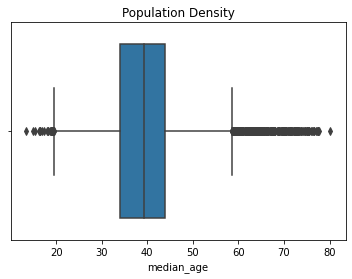

In [ ]:
sns.boxplot(data_train['median_age'])
plt.title('Population Density')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



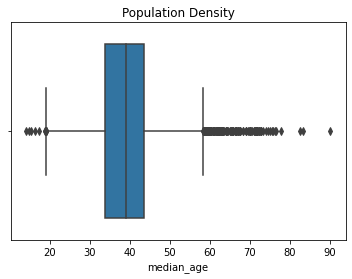

In [ ]:
sns.boxplot(data_test['median_age'])
plt.title('Population Density')
plt.show()

6. Create bins for population into a new variable by selecting appropriate class interval so that the no of categories(bins) don’t exceed 5 for the ease of analysis. Analyze the married, separated and divorced population for these population brackets. Visualize using appropriate chart type.

In [ ]:
# Consider all the columns that are related to population and their respective population bracket columns along with age
age_dataframe = data_train[['city', 'pop', 'male_pop', 'female_pop', 'male_age_median', 'female_age_median', 'married', 'separated', 'divorced']]

Categorize the population based on Age Groups:

Child --> 0 - 14

Youth --> 15 - 24

Young Adult --> 25 - 35

Adult --> 36 - 60

Old Adult --> above 61

In [ ]:
age_dataframe['male_age_median'].describe()

count    27321.000000
mean        38.074193
std          7.847366
min          9.750000
25%         32.916670
50%         37.916670
75%         42.916670
max         80.166670
Name: male_age_median, dtype: float64

In [ ]:
age_dataframe['female_age_median'].describe()

count    27321.000000
mean        40.355099
std          8.009218
min         13.250000
25%         35.000000
50%         40.500000
75%         45.333330
max         82.250000
Name: female_age_median, dtype: float64

In [ ]:
bins = [0, 14, 24, 35, 60, 100]
labels = ['Child', 'Youth', 'Young Adult', 'Adult', 'Old Adult']

In [ ]:
age_dataframe['male_population_bracket'] = pd.cut(age_dataframe['male_age_median'], bins, labels = labels)
age_dataframe['female_population_bracket'] = pd.cut(age_dataframe['female_age_median'], bins, labels = labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



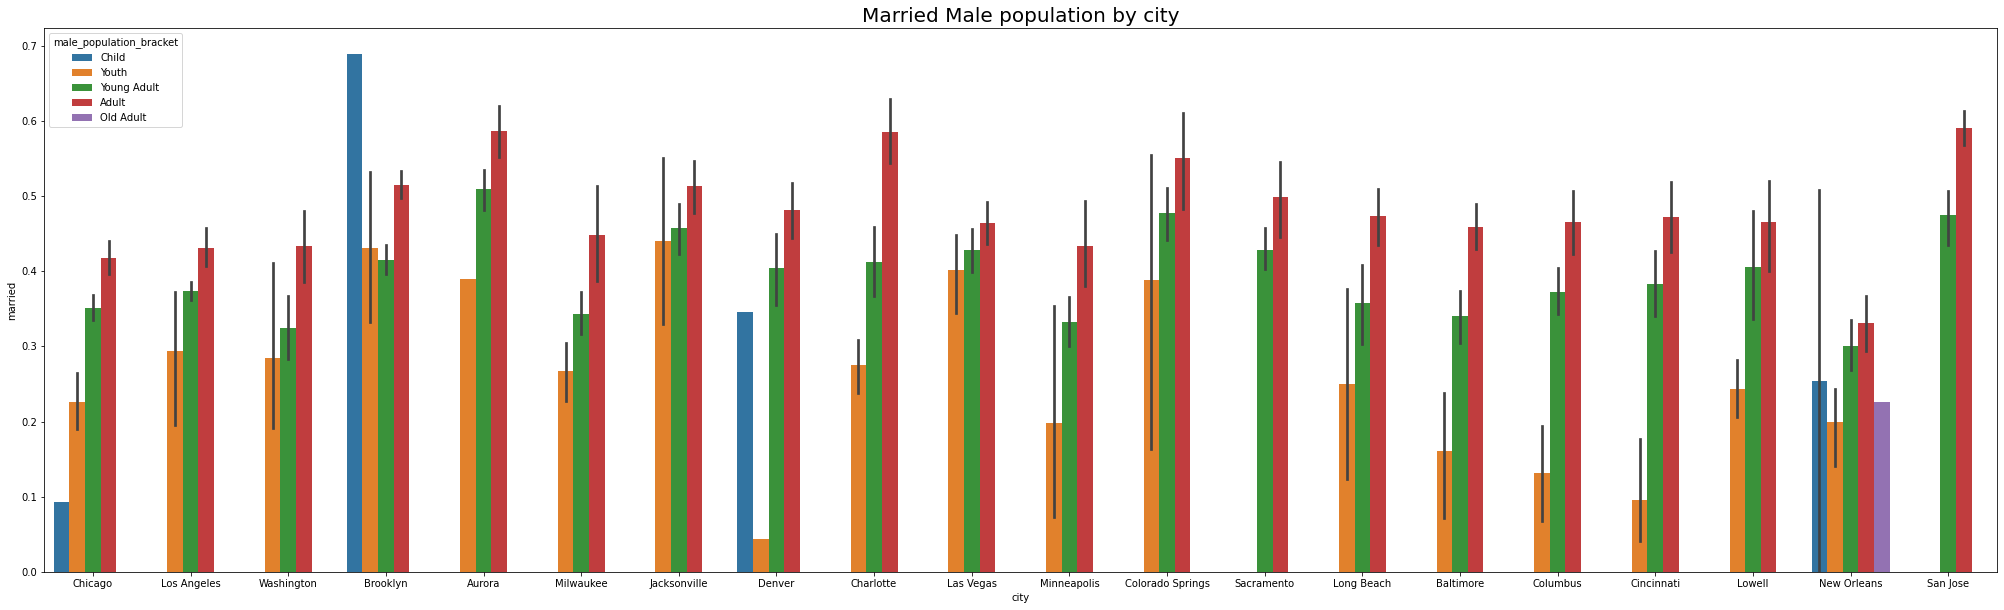

In [ ]:
plt.figure(figsize = (35, 10))
ax = sns.barplot(x = 'city', y = 'married', hue = 'male_population_bracket', data = age_dataframe, 
           order = cities)

ax.set_title('Married Male population by city', fontsize = 20)

plt.show()

Brooklyn has highest rate of child (boy) marriages among these 20 cities

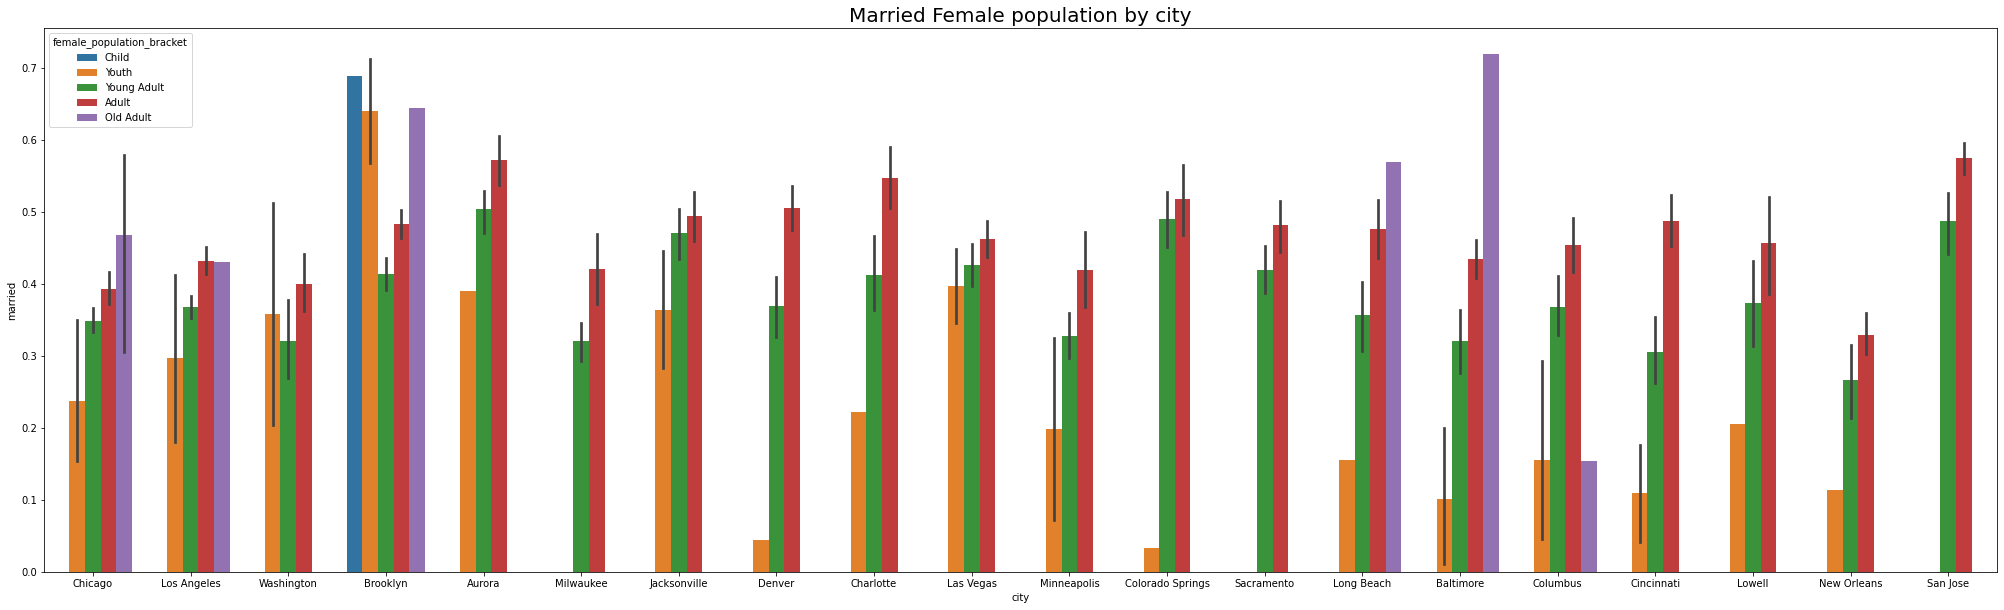

In [ ]:
plt.figure(figsize = (35, 10))
ax = sns.barplot(x = 'city', y = 'married', hue = 'female_population_bracket', data = age_dataframe, 
           order = cities)

ax.set_title('Married Female population by city', fontsize = 20)

plt.show()

Except Brooklyn, no other cities have reported married female children

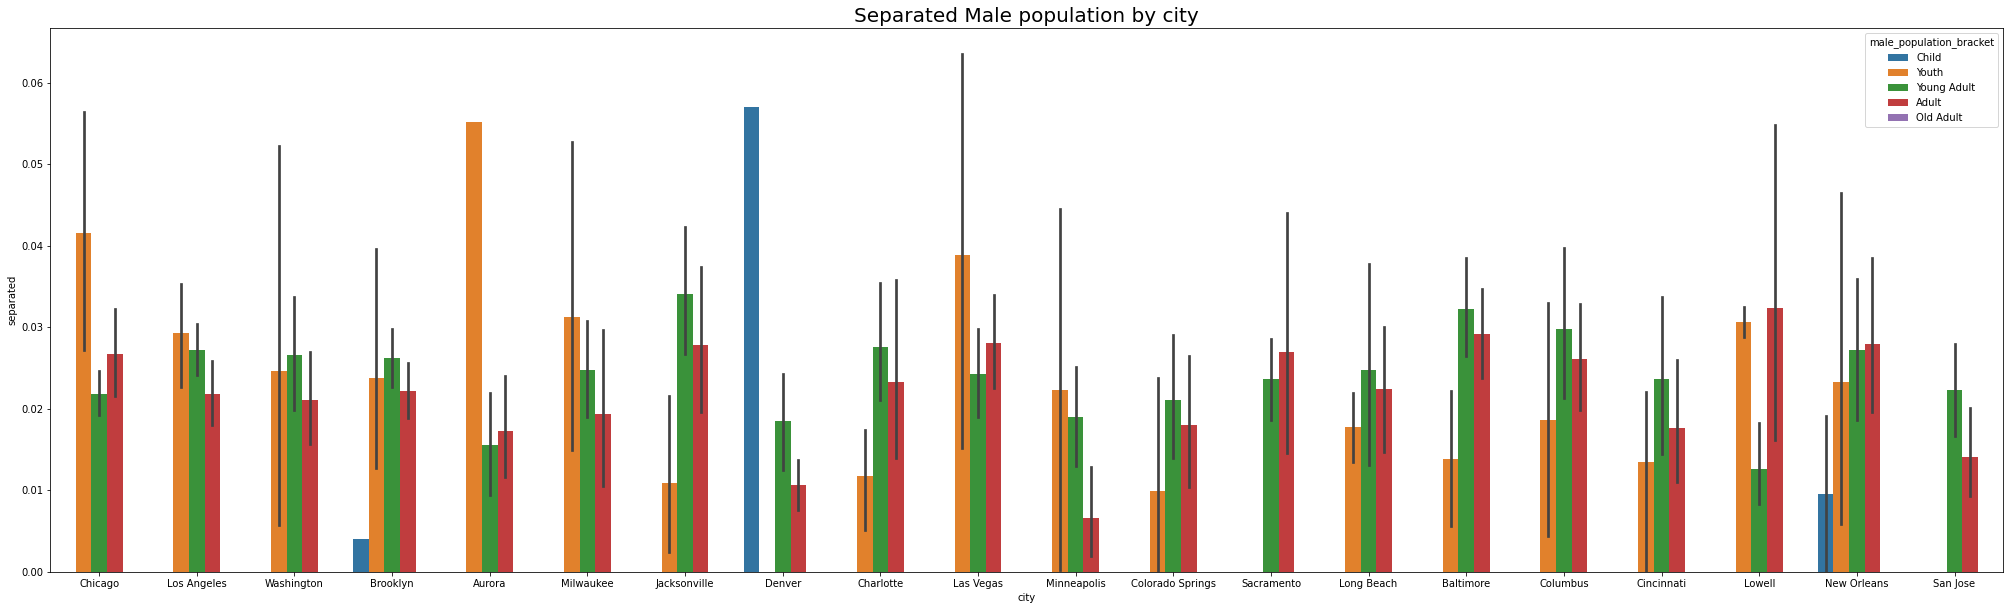

In [ ]:
plt.figure(figsize = (35, 10))
ax = sns.barplot(x = 'city', y = 'separated', hue = 'male_population_bracket', data = age_dataframe, 
           order = cities)

ax.set_title('Separated Male population by city', fontsize = 20)

plt.show()

Denver has highest rate of separated male children.

Aurora has highest rate of separated male youths.

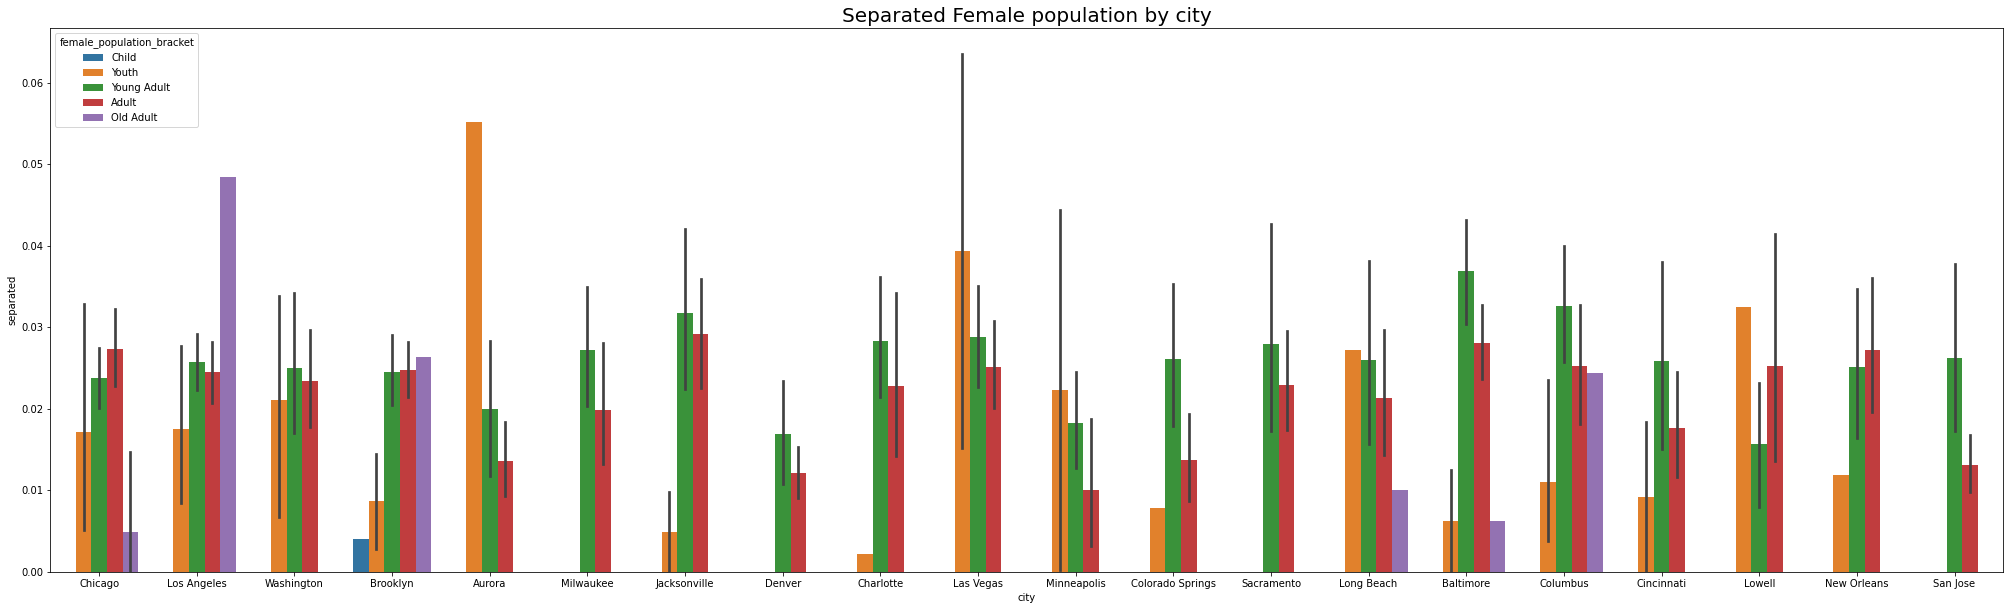

In [ ]:
plt.figure(figsize = (35, 10))
ax = sns.barplot(x = 'city', y = 'separated', hue = 'female_population_bracket', data = age_dataframe, 
           order = cities)

ax.set_title('Separated Female population by city', fontsize = 20)

plt.show()

Aurora has highest rate of separated female youth followed by old adults from LA

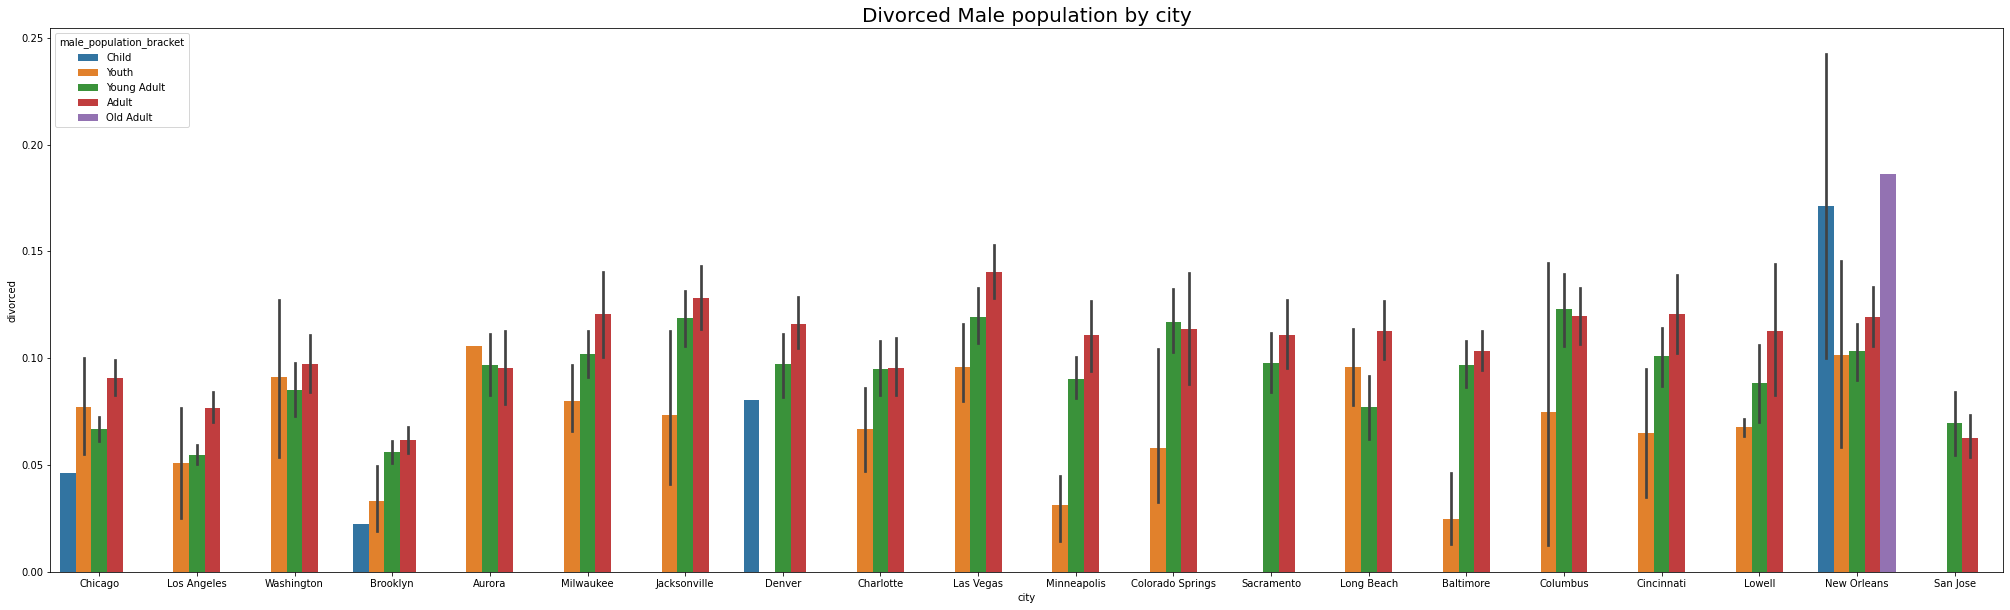

In [ ]:
plt.figure(figsize = (35, 10))
ax = sns.barplot(x = 'city', y = 'divorced', hue = 'male_population_bracket', data = age_dataframe, 
           order = cities)

ax.set_title('Divorced Male population by city', fontsize = 20)

plt.show()

New Orieans has highest divorced male children and old adults

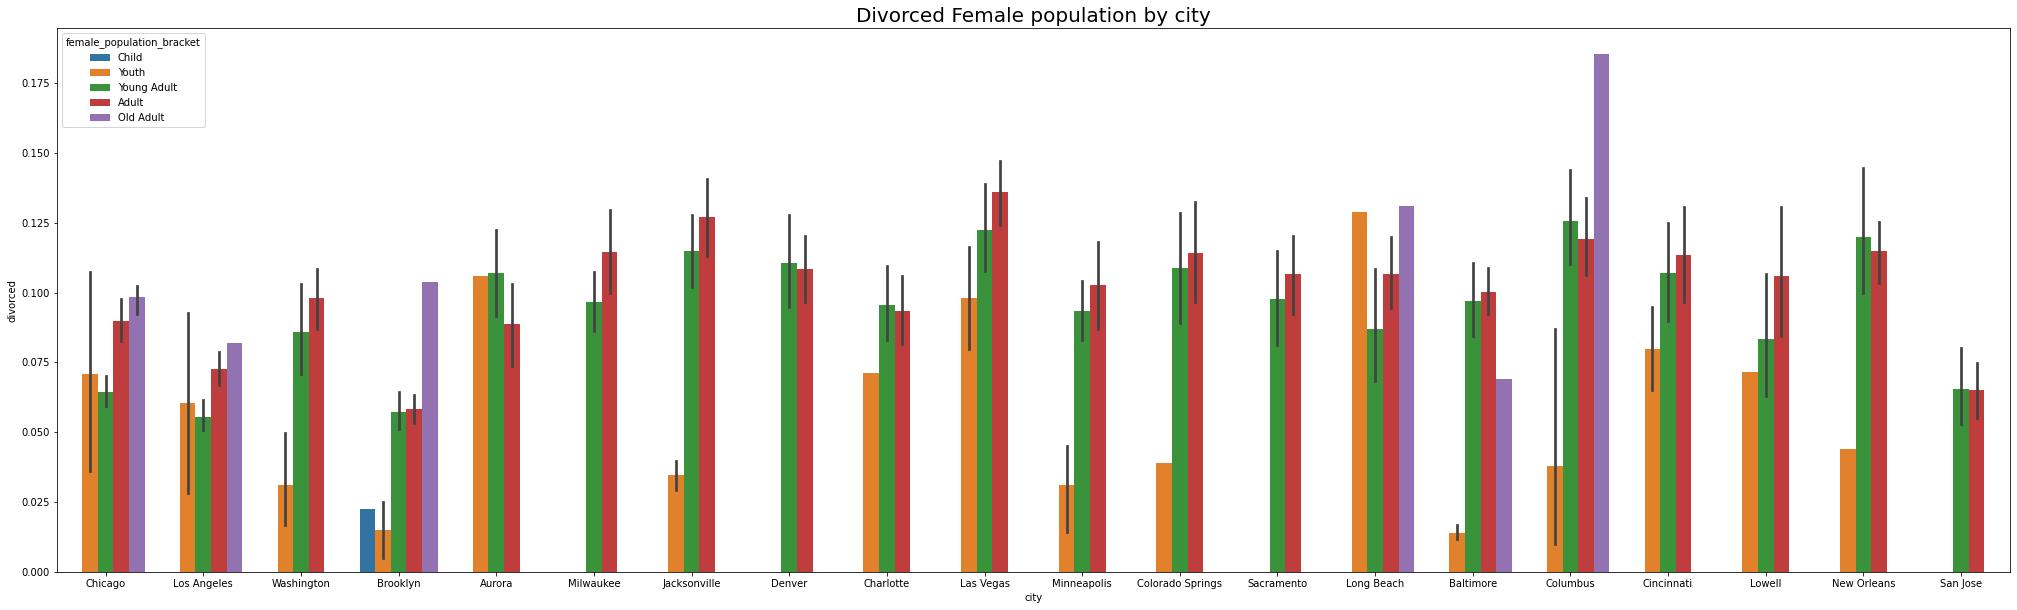

In [ ]:
plt.figure(figsize = (35, 10))
ax = sns.barplot(x = 'city', y = 'divorced', hue = 'female_population_bracket', data = age_dataframe, 
           order = cities)

ax.set_title('Divorced Female population by city', fontsize = 20)

plt.show()

Columbus has highest Divorced Female old adults.

7. Please detail your observations for rent as a percentage of income at an overall level and for different states.

In [ ]:
state_rent = data_train[['state', 'rent_mean', 'hi_mean', 'family_mean']]
state_rent.head()

,state,rent_mean,hi_mean,family_mean
UID,,,,
267822,New York,769.38638,63125.28406,67994.14790
246444,Indiana,804.87924,41931.92593,50670.10337
245683,Indiana,742.77365,84942.68317,95262.51431
279653,Puerto Rico,803.42018,48733.67116,56401.68133
247218,Kansas,938.56493,31834.15466,54053.42396


In [ ]:
Overall_rent_percentage = (state_rent['rent_mean'].sum() / state_rent['hi_mean'].sum()) * 100
round(Overall_rent_percentage, 2)

1.5

The overall percentage of income for different states is 1.5 %

In [ ]:
state_rent['overall_rent_percent'] = round((state_rent['rent_mean'] / state_rent['hi_mean']) * 100, 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
state_rent.head()

,state,rent_mean,hi_mean,family_mean,overall_rent_percent
UID,,,,,
267822,New York,769.38638,63125.28406,67994.14790,1.22
246444,Indiana,804.87924,41931.92593,50670.10337,1.92
245683,Indiana,742.77365,84942.68317,95262.51431,0.87
279653,Puerto Rico,803.42018,48733.67116,56401.68133,1.65
247218,Kansas,938.56493,31834.15466,54053.42396,2.95


In [ ]:
top_500_states_with_high_pct = list(state_rent.nlargest(500, 'overall_rent_percent').state.unique())

In [ ]:
# len(top_500_states_with_high_pct)

40

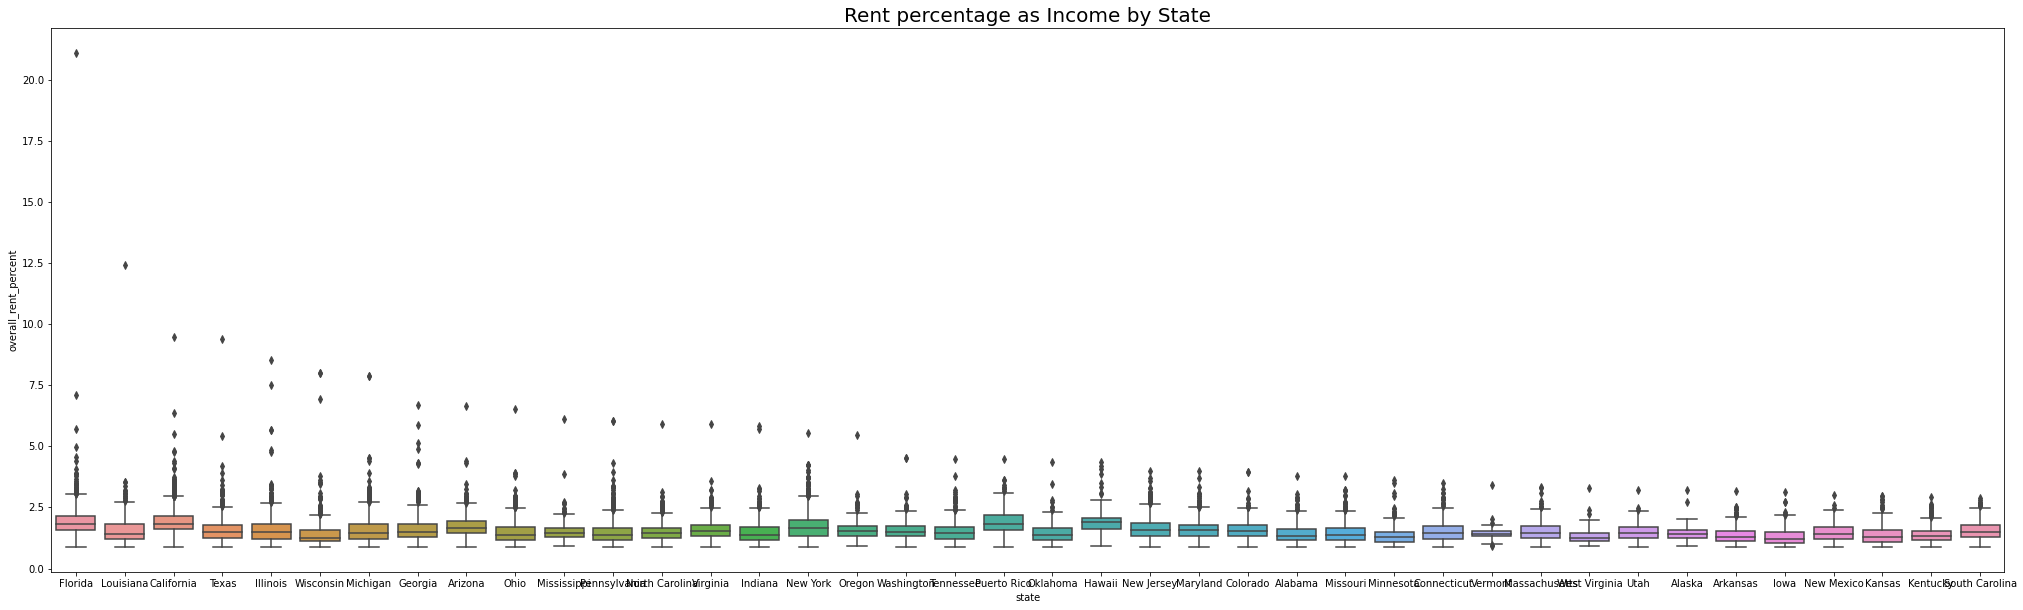

In [ ]:
plt.figure(figsize = (35, 10))
ax = sns.boxplot(x = 'state', y = 'overall_rent_percent', data=state_rent.nlargest(26585, 'overall_rent_percent'), 
            order = top_500_states_with_high_pct
           ).set_title('Rent percentage as Income by State', fontsize = 20)
plt.show()

8. Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings

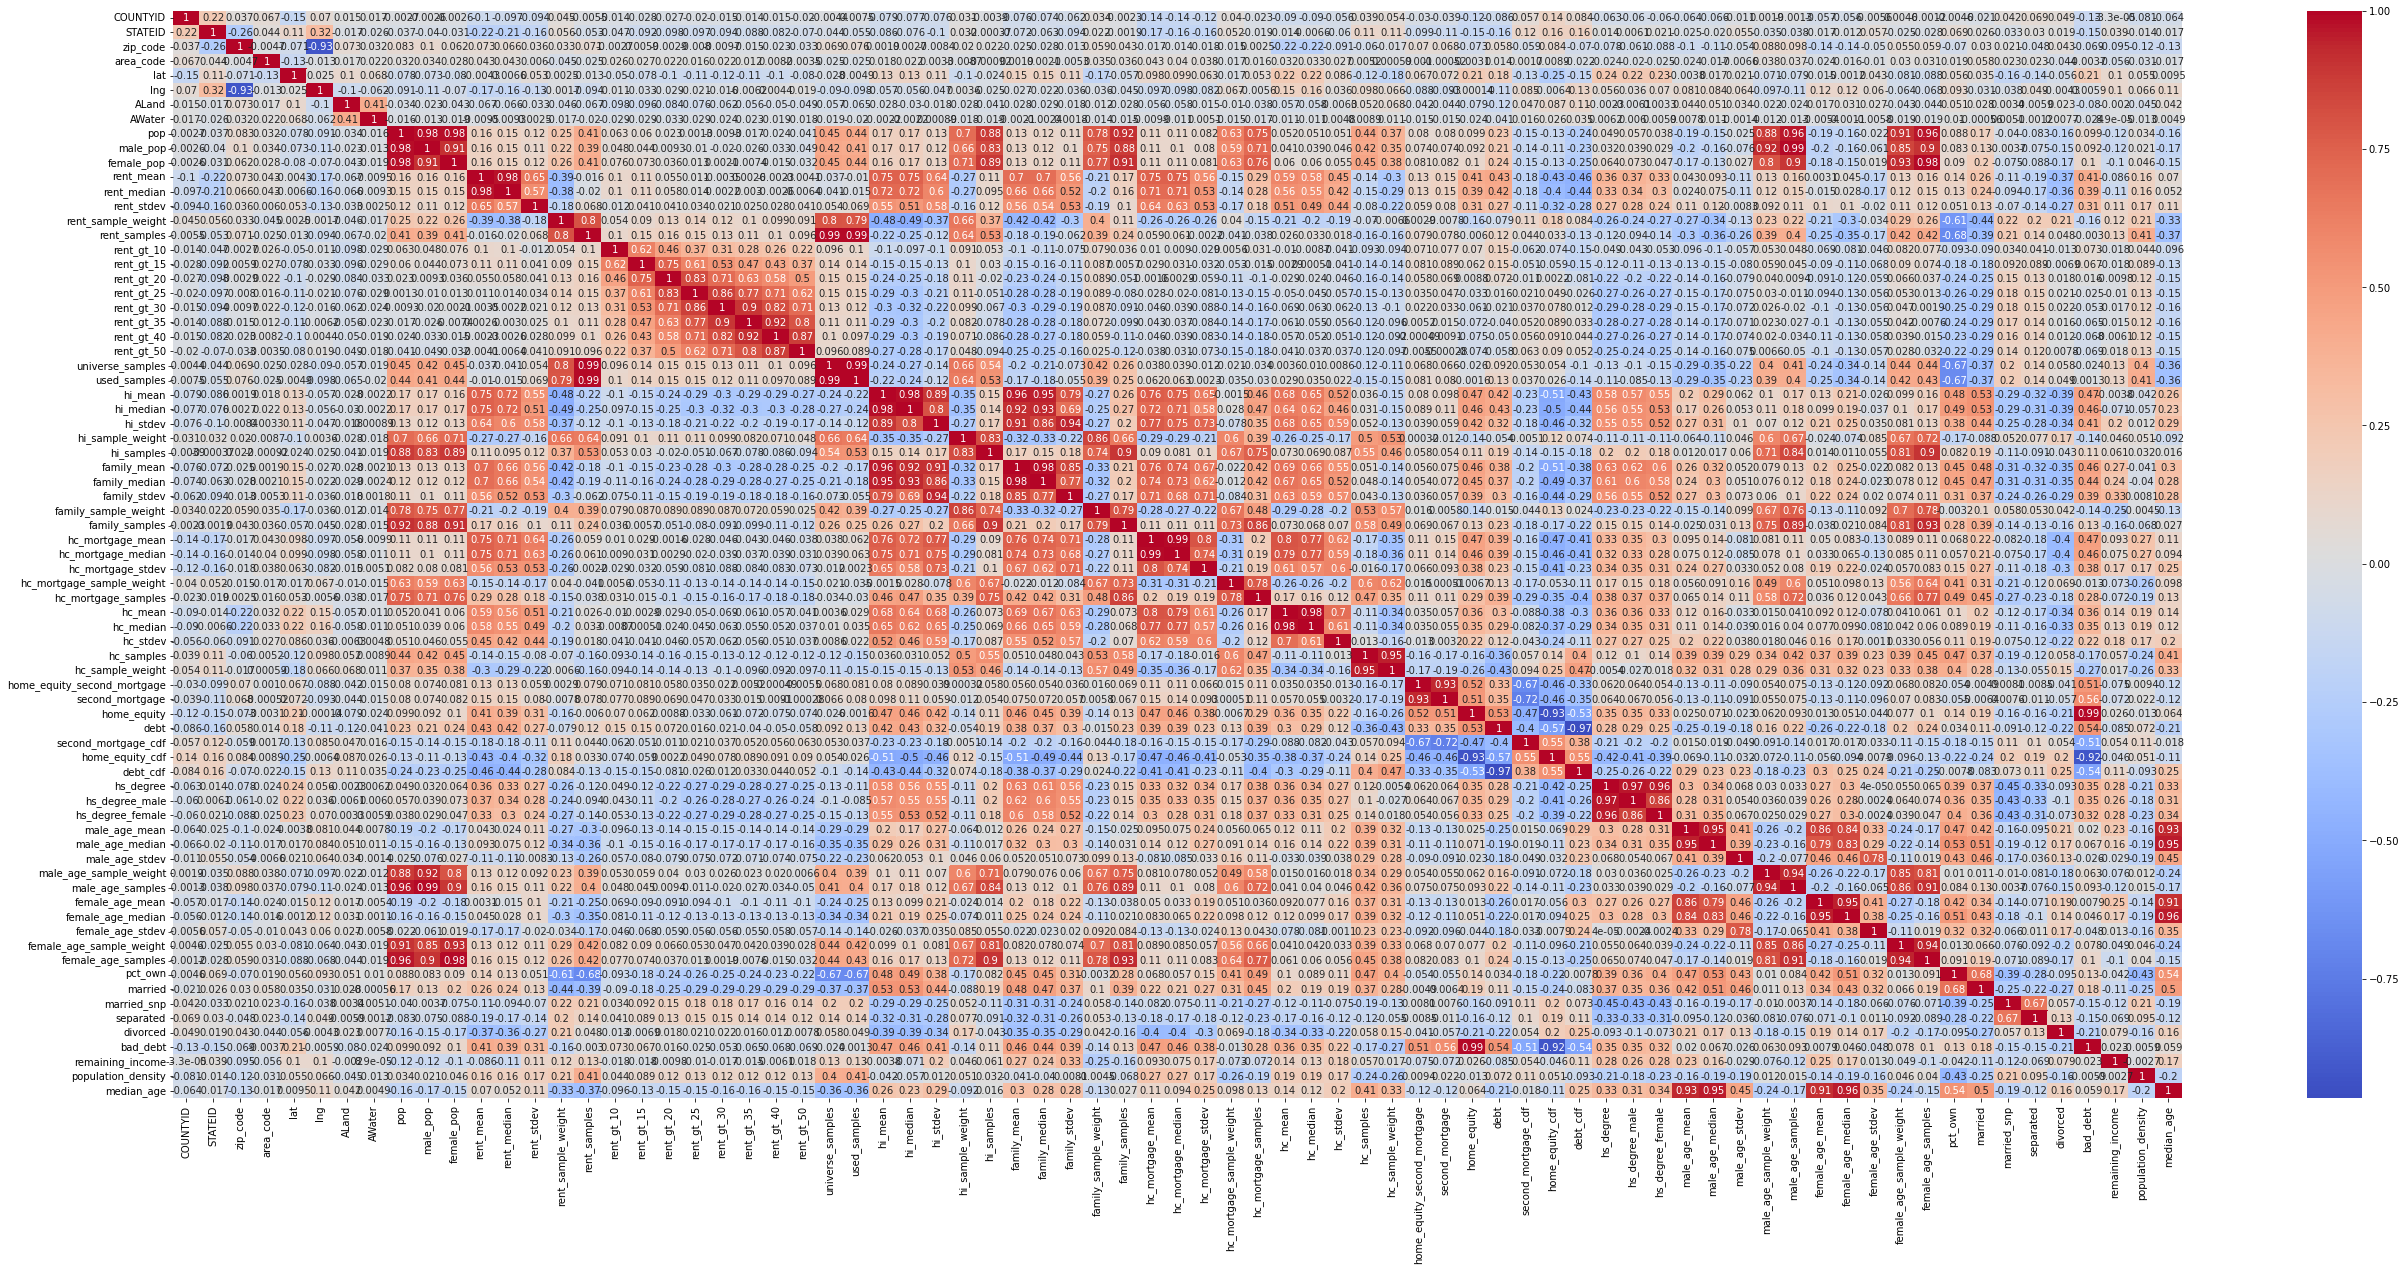

In [ ]:
correlation = data_train.corr()

plt.figure(figsize=(45,20))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.show()

Observations:
1. Population, Male population and female population are highly correlated
2. hi_mean and hi_median, rent_mean and rent_median, family_mean and family_median are highly correlated
3. male_age_mean and male_age_median, female_age_mean and female_age_median are highly correlated
4. home_equity is highly correlated with bad_debt

9. The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. Each variable is assumed to depend on a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent random variability, known as "specific variance" because it is specific to one variable.

Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data

--> Highschool graduation rates

--> Median population age

--> Second Mortgage Statistics

--> Percent Own

-->Bad Debt Expense


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27321 entries, 267822 to 265371
Data columns (total 81 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   COUNTYID                     27321 non-null  int64   
 1   STATEID                      27321 non-null  int64   
 2   state                        27321 non-null  object  
 3   state_ab                     27321 non-null  object  
 4   city                         27321 non-null  object  
 5   place                        27321 non-null  object  
 6   type                         27321 non-null  object  
 7   zip_code                     27321 non-null  int64   
 8   area_code                    27321 non-null  int64   
 9   lat                          27321 non-null  float64 
 10  lng                          27321 non-null  float64 
 11  ALand                        27321 non-null  float64 
 12  AWater                       27321 non-null  int64   


In [ ]:
for col in data_train.columns:
    print(col,' --> ' ,data_train[col].dtype)

COUNTYID  -->  int64
STATEID  -->  int64
state  -->  object
state_ab  -->  object
city  -->  object
place  -->  object
type  -->  object
zip_code  -->  int64
area_code  -->  int64
lat  -->  float64
lng  -->  float64
ALand  -->  float64
AWater  -->  int64
pop  -->  int64
male_pop  -->  int64
female_pop  -->  int64
rent_mean  -->  float64
rent_median  -->  float64
rent_stdev  -->  float64
rent_sample_weight  -->  float64
rent_samples  -->  float64
rent_gt_10  -->  float64
rent_gt_15  -->  float64
rent_gt_20  -->  float64
rent_gt_25  -->  float64
rent_gt_30  -->  float64
rent_gt_35  -->  float64
rent_gt_40  -->  float64
rent_gt_50  -->  float64
universe_samples  -->  int64
used_samples  -->  int64
hi_mean  -->  float64
hi_median  -->  float64
hi_stdev  -->  float64
hi_sample_weight  -->  float64
hi_samples  -->  float64
family_mean  -->  float64
family_median  -->  float64
family_stdev  -->  float64
family_sample_weight  -->  float64
family_samples  -->  float64
hc_mortgage_mean  -->  flo

In [ ]:
filename = "/gdrive/My Drive/Project_1/data_rep.xlsx"

In [ ]:
data_train.to_excel(filename)

In [ ]:
def num_variables(input_dataframe):
    num_variables = list(input_dataframe.select_dtypes(include = ['int', 'float']).columns)
    return num_variables

In [ ]:
def cat_variables(dataframe):
    cat_variables = list(dataframe.select_dtypes(exclude = ['int', 'float']).columns)
    return cat_variables

In [ ]:
cat_variables(data_train)

['state', 'state_ab', 'city', 'place', 'type', 'bins']

In [ ]:
num_variables(data_train)

['COUNTYID',
 'STATEID',
 'zip_code',
 'area_code',
 'lat',
 'lng',
 'ALand',
 'AWater',
 'pop',
 'male_pop',
 'female_pop',
 'rent_mean',
 'rent_median',
 'rent_stdev',
 'rent_sample_weight',
 'rent_samples',
 'rent_gt_10',
 'rent_gt_15',
 'rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'universe_samples',
 'used_samples',
 'hi_mean',
 'hi_median',
 'hi_stdev',
 'hi_sample_weight',
 'hi_samples',
 'family_mean',
 'family_median',
 'family_stdev',
 'family_sample_weight',
 'family_samples',
 'hc_mortgage_mean',
 'hc_mortgage_median',
 'hc_mortgage_stdev',
 'hc_mortgage_sample_weight',
 'hc_mortgage_samples',
 'hc_mean',
 'hc_median',
 'hc_stdev',
 'hc_samples',
 'hc_sample_weight',
 'home_equity_second_mortgage',
 'second_mortgage',
 'home_equity',
 'debt',
 'second_mortgage_cdf',
 'home_equity_cdf',
 'debt_cdf',
 'hs_degree',
 'hs_degree_male',
 'hs_degree_female',
 'male_age_mean',
 'male_age_median',
 'male_age_stdev',
 'male_age_sample_weig

In [ ]:
num_data_train = data_train[num_variables(data_train)]
num_data_train

,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,pop,male_pop,...,female_age_samples,pct_own,married,married_snp,separated,divorced,bad_debt,remaining_income,population_density,median_age
UID,,,,,,,,,,,,,,,,,,,,,
267822,53,36,13346,315,42.840812,-75.501524,2.021834e+08,1699120,5230,2612,...,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770,0.09408,4868.86384,0.000026,44.667430
246444,141,18,46616,574,41.701441,-86.266614,1.560828e+06,100363,2633,1349,...,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030,0.04274,8738.17744,0.001687,34.722748
245683,63,18,46122,317,39.792202,-86.515246,6.956160e+07,284193,6881,3643,...,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657,0.09512,10319.83114,0.000099,41.774472
279653,127,72,927,787,18.396103,-66.104169,1.105793e+06,0,2700,1141,...,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106,0.01086,7668.01017,0.002442,49.879012
247218,161,20,66502,785,39.195573,-96.569366,2.554403e+06,0,5637,2586,...,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109,0.05426,22219.26930,0.002207,21.965629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279212,43,72,769,787,18.076060,-66.358379,6.970300e+05,0,1847,909,...,938.0,0.60422,0.24603,0.03042,0.02249,0.14683,0.00000,2373.47596,0.002650,40.904894
277856,91,42,19422,215,40.158138,-75.307271,5.077337e+06,11786,4155,2116,...,2039.0,0.68072,0.61127,0.05003,0.02473,0.04888,0.20908,-993.01490,0.000818,39.160488
233000,87,8,80653,970,40.410316,-103.814003,1.323262e+09,17577610,2829,1465,...,1364.0,0.78508,0.70451,0.01386,0.00520,0.07712,0.07857,8988.31921,0.000002,44.089311


In [ ]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 660 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 199 kB 34.1 MB/s 
     |████████████████████████████████| 8.8 MB 40.6 MB/s 
     |████████████████████████████████| 98 kB 7.8 MB/s 
     |████████████████████████████████| 468 kB 53.9 MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=f3c37760464fdc86ced7253af2bc276feab61c8f6db20eca9ec2d3cff192e576
  Stored in directory: /root/.cache/pip/wheels/ed/90/48/766e09628cc5bbcf57c2eb063972c1e956a03422dd6d84fde2
Successfully built factor-analyzer


In [ ]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer( rotation=None, n_factors = 25)
fa.fit(num_data_train)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([1.55581219e+01, 1.20396670e+01, 8.68876896e+00, 4.79913681e+00,
       4.13158233e+00, 3.34792590e+00, 2.44192488e+00, 2.19333328e+00,
       1.55322292e+00, 1.47596032e+00, 1.34628697e+00, 1.26783142e+00,
       1.16129056e+00, 1.02040080e+00, 9.79683316e-01, 9.01439571e-01,
       8.96619779e-01, 8.36761637e-01, 7.86939170e-01, 6.85404438e-01,
       6.17044854e-01, 5.99153480e-01, 5.78287414e-01, 5.64327883e-01,
       5.37892414e-01, 4.93558204e-01, 4.48154587e-01, 3.99022405e-01,
       3.66291278e-01, 3.44407488e-01, 3.26282410e-01, 3.09169445e-01,
       3.04185468e-01, 2.63636830e-01, 2.58014909e-01, 2.45677925e-01,
       2.01662714e-01, 1.94754006e-01, 1.85649455e-01, 1.73201309e-01,
       1.64642766e-01, 1.41323719e-01, 1.31327596e-01, 1.25595508e-01,
       1.00563094e-01, 9.36103791e-02, 9.09222196e-02, 8.88622946e-02,
       7.43616380e-02, 6.43806579e-02, 5.74788750e-02, 5.44082679e-02,
       4.67655101e-02, 3.46844813e-02, 2.96321549e-02, 2.53468155e-02,
      

In [ ]:
loadings = fa.loadings_

In [ ]:
num_data_train.shape

(27321, 75)

In [ ]:
x_vals = range(1, num_data_train.shape[1]+1)

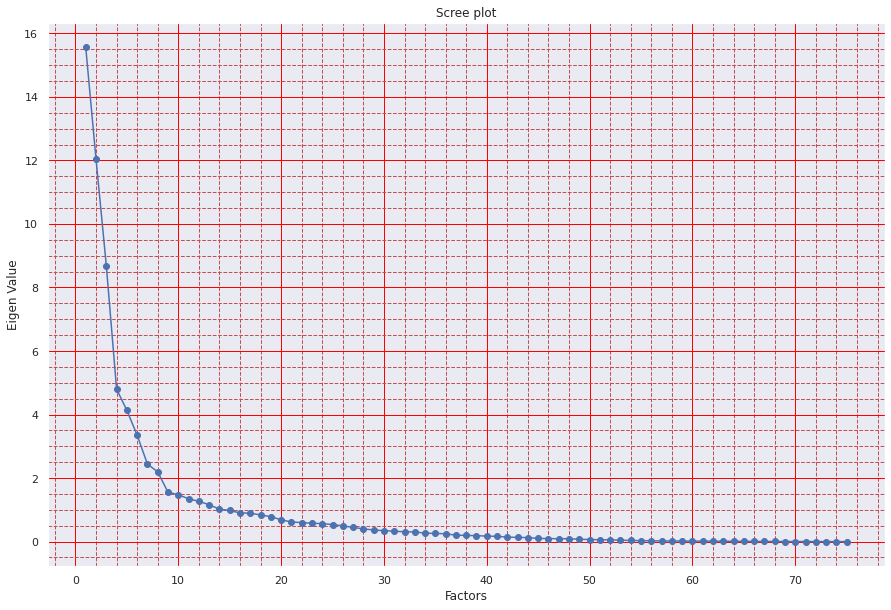

In [ ]:
plt.figure(figsize = (15,10))
plt.scatter(x_vals, ev)
plt.plot(x_vals, ev)
plt.title('Scree plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid(color = 'red', )
plt.grid(b=True, which='minor', color='r', linestyle='--')
plt.minorticks_on()
plt.show()

In [ ]:
Factors  = pd.DataFrame.from_records(loadings)

Factors = Factors.add_prefix('Factor ')

Factors.index = num_data_train.columns
Factors

,Factor 0,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8,Factor 9,...,Factor 15,Factor 16,Factor 17,Factor 18,Factor 19,Factor 20,Factor 21,Factor 22,Factor 23,Factor 24
COUNTYID,-0.113929,0.019243,0.066401,-0.057829,0.020883,-0.069898,-0.058287,0.019684,0.027485,-0.016464,...,-0.042331,0.251701,0.126070,0.082743,-0.144210,0.109255,0.000848,-0.022668,0.000109,-0.041551
STATEID,-0.107016,-0.027618,0.175212,-0.095630,0.091874,-0.009389,-0.349565,0.208047,0.003155,0.077122,...,0.142677,0.387048,0.161365,0.086024,0.121114,0.254160,-0.063795,0.092882,-0.025851,-0.001264
zip_code,-0.041385,0.106484,-0.070478,-0.135710,-0.097149,-0.164181,0.627109,-0.614830,0.039249,0.131634,...,0.189959,0.107164,0.012393,0.053577,-0.022080,0.037138,0.023191,-0.031963,0.003627,-0.024935
area_code,0.016661,0.021339,-0.012992,0.020386,-0.013240,-0.083225,0.026385,0.046402,-0.010017,-0.032202,...,-0.012675,0.098516,0.049184,-0.056091,-0.157606,0.075929,0.014790,-0.053477,0.004593,0.026988
lat,0.180636,-0.097961,-0.062702,-0.149375,-0.041900,0.204518,-0.196893,-0.024791,-0.025670,0.254128,...,0.247912,-0.071556,-0.044900,0.069244,0.359470,0.000974,-0.034311,0.106054,0.003603,-0.065814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
divorced,-0.359975,-0.081100,0.236644,0.045698,-0.008791,0.309087,0.054625,-0.140673,-0.052134,-0.063719,...,-0.007555,-0.130645,0.082867,0.278397,-0.200227,-0.000389,-0.059026,0.241334,-0.046264,0.055951
bad_debt,0.584741,0.030311,-0.312059,-0.043956,-0.435479,0.385228,0.040283,0.166495,0.067771,0.031053,...,0.064790,0.083553,0.025478,0.029119,-0.039740,0.016585,0.005652,-0.019747,-0.016406,-0.007307
remaining_income,0.116951,-0.117462,0.033773,0.113661,0.292873,0.345726,-0.237092,-0.229276,0.219608,0.036299,...,-0.190228,-0.047808,-0.005000,0.101700,0.115381,0.074365,0.077891,-0.181127,-0.098560,0.003746
population_density,-0.044449,0.093358,-0.403633,0.047930,0.334198,0.069395,0.061277,0.193433,-0.037336,-0.026770,...,-0.051170,0.007103,-0.117694,-0.076426,0.190947,0.102980,-0.025821,0.031391,-0.035175,0.012940


--> Highschool graduation rates

--> Median population age

--> Second Mortgage Statistics

--> Percent Own

-->Bad Debt Expense

In [ ]:
Factors_df = round(Factors.loc[['hs_degree', 'hs_degree_male', 'hs_degree_female',"male_age_median", "female_age_median", "home_equity_second_mortgage", 'second_mortgage', 'second_mortgage_cdf', 'pct_own', 'bad_debt'], :], 2)

In [ ]:
def color_negative_red(data_value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if data_value < -0.4:
    color = 'yellow'
  elif data_value > 0.8:
    color = 'red'
  else:
    color = 'blue'

  return 'color: %s' % color

In [ ]:
Factors_df.style.applymap(color_negative_red)

,Factor 0,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8,Factor 9,Factor 10,Factor 11,Factor 12,Factor 13,Factor 14,Factor 15,Factor 16,Factor 17,Factor 18,Factor 19,Factor 20,Factor 21,Factor 22,Factor 23,Factor 24
hs_degree,0.680000,-0.090000,0.180000,-0.080000,-0.020000,0.260000,-0.380000,-0.420000,0.010000,-0.070000,0.030000,0.170000,0.030000,0.120000,0.160000,0.130000,-0.080000,-0.030000,-0.130000,-0.050000,0.040000,-0.020000,-0.010000,-0.000000,0.030000
hs_degree_male,0.670000,-0.080000,0.140000,-0.070000,-0.010000,0.240000,-0.340000,-0.390000,-0.000000,-0.060000,0.030000,0.140000,0.020000,0.110000,0.130000,0.110000,-0.060000,-0.020000,-0.110000,-0.040000,0.050000,-0.020000,-0.010000,0.000000,0.030000
hs_degree_female,0.640000,-0.100000,0.200000,-0.070000,-0.030000,0.240000,-0.360000,-0.370000,0.020000,-0.080000,0.040000,0.150000,0.030000,0.090000,0.120000,0.110000,-0.070000,-0.020000,-0.090000,-0.040000,0.020000,-0.020000,0.010000,-0.010000,0.020000
male_age_median,0.370000,-0.330000,0.580000,0.380000,0.070000,0.240000,0.180000,0.000000,-0.030000,-0.200000,0.050000,-0.100000,0.030000,0.070000,-0.090000,0.030000,0.090000,0.040000,-0.040000,-0.010000,-0.090000,0.040000,0.120000,-0.190000,-0.020000
female_age_median,0.310000,-0.330000,0.590000,0.430000,0.060000,0.280000,0.160000,0.030000,-0.070000,-0.150000,0.030000,-0.090000,0.000000,0.060000,-0.060000,-0.000000,0.000000,0.110000,-0.030000,0.040000,0.070000,-0.020000,-0.110000,0.160000,0.020000
home_equity_second_mortgage,0.170000,0.120000,-0.280000,-0.140000,-0.540000,0.390000,0.210000,0.170000,0.320000,-0.040000,-0.190000,0.180000,0.040000,0.170000,-0.090000,-0.030000,-0.010000,0.000000,-0.010000,0.020000,-0.020000,0.000000,-0.010000,-0.000000,0.010000
second_mortgage,0.190000,0.110000,-0.310000,-0.130000,-0.560000,0.410000,0.230000,0.180000,0.350000,-0.040000,-0.220000,0.200000,0.050000,0.190000,-0.120000,-0.050000,-0.020000,0.000000,-0.020000,0.040000,-0.010000,-0.000000,-0.010000,-0.000000,0.020000
second_mortgage_cdf,-0.320000,-0.120000,0.120000,0.080000,0.530000,-0.300000,-0.140000,-0.080000,-0.150000,-0.030000,0.090000,-0.130000,-0.020000,-0.100000,0.110000,0.030000,0.070000,-0.000000,-0.010000,-0.020000,0.010000,0.000000,-0.030000,-0.020000,0.020000
pct_own,0.490000,-0.150000,0.620000,0.110000,-0.340000,-0.230000,-0.070000,0.030000,-0.030000,0.070000,0.030000,0.040000,0.010000,-0.020000,-0.060000,-0.010000,0.020000,0.040000,0.000000,0.030000,-0.050000,0.020000,-0.000000,0.030000,-0.000000
bad_debt,0.580000,0.030000,-0.310000,-0.040000,-0.440000,0.390000,0.040000,0.170000,0.070000,0.030000,0.100000,-0.180000,-0.040000,-0.220000,0.210000,0.060000,0.080000,0.030000,0.030000,-0.040000,0.020000,0.010000,-0.020000,-0.020000,-0.010000


In [ ]:
factor_variance  = fa.get_factor_variance() # Get variance for each factor
factor_variance

# Proportion Variance --> eigen value / number of variables, measures dispersion in a proportion
# SS loading --> Sum of Squared Loadings, a factor is worth keeping if the SS loading is greater than 1
# Cummulative Variance --> Amount of variance of original data explained by n+(n-1) factors [n-->sample size]

(array([15.47408895, 11.98717232,  8.58913273,  4.67973996,  3.99974775,
         3.24329385,  2.3146888 ,  2.0691612 ,  1.36908877,  1.26565043,
         0.97051889,  0.92771352,  0.88270156,  0.84451353,  0.74547668,
         0.62577331,  0.52273582,  0.50545219,  0.45890526,  0.43722511,
         0.34794247,  0.31756023,  0.29664252,  0.26335339,  0.23826867]),
 array([0.20632119, 0.15982896, 0.11452177, 0.06239653, 0.05332997,
        0.04324392, 0.03086252, 0.02758882, 0.01825452, 0.01687534,
        0.01294025, 0.01236951, 0.01176935, 0.01126018, 0.00993969,
        0.00834364, 0.00696981, 0.00673936, 0.00611874, 0.00582967,
        0.00463923, 0.00423414, 0.00395523, 0.00351138, 0.00317692]),
 array([0.20632119, 0.36615015, 0.48067192, 0.54306845, 0.59639842,
        0.63964234, 0.67050486, 0.69809367, 0.71634819, 0.73322353,
        0.74616378, 0.7585333 , 0.77030265, 0.78156283, 0.79150252,
        0.79984616, 0.80681597, 0.81355534, 0.81967407, 0.82550374,
        0.83014297,

In [ ]:
Factor_variance  = pd.DataFrame.from_records(factor_variance)

Factor_variance = Factor_variance.add_prefix('Factor ')

Factor_variance.index = ['SS Loadings', 'Proportion Variance', 'Cumulative Variance']
round(Factor_variance, 2)

,Factor 0,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7,Factor 8,Factor 9,...,Factor 15,Factor 16,Factor 17,Factor 18,Factor 19,Factor 20,Factor 21,Factor 22,Factor 23,Factor 24
SS Loadings,15.47,11.99,8.59,4.68,4.00,3.24,2.31,2.07,1.37,1.27,...,0.63,0.52,0.51,0.46,0.44,0.35,0.32,0.30,0.26,0.24
Proportion Variance,0.21,0.16,0.11,0.06,0.05,0.04,0.03,0.03,0.02,0.02,...,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00
Cumulative Variance,0.21,0.37,0.48,0.54,0.60,0.64,0.67,0.70,0.72,0.73,...,0.80,0.81,0.81,0.82,0.83,0.83,0.83,0.84,0.84,0.85


Build a linear Regression model to predict the total monthly expenditure for home mortgages loan; please refer - ‘deplotment_RE.xlsx’. 
Column hc_mortgage_mean is predicted variable. This is mean monthly mortgage and owner costs of specified geographical location.
Note: Exclude loans from prediction model which have NaN values for hc_mortgage_mean. NaN represents not a number/missing values.

Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step
Run another model at State level. There are 52 states in USA.

Considerations: Keep below considerations while building a linear regression model

Variables should have significant impact on predicting Monthly mortgage and owner costs
Utilize all predictor variable to start with initial hypothesis
R square of 60% and above should be achieved
Ensure Multi-collinearity does not exist in dependent variables
Test if predicted variable is normally distributed

In [ ]:
train_dataframe = pd.read_csv("/gdrive/My Drive/Project_1/train.csv")
test_dataframe = pd.read_csv("/gdrive/My Drive/Project_1/test.csv")
# train_dataframe.head()

In [ ]:
train_dataframe.isna().sum()

UID                0
BLOCKID        27321
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          268
married          191
married_snp      191
separated        191
divorced         191
Length: 80, dtype: int64

In [ ]:
test_dataframe.isna().sum()

UID                0
BLOCKID        11709
SUMLEVEL           0
COUNTYID           0
STATEID            0
               ...  
pct_own          122
married           84
married_snp       84
separated         84
divorced          84
Length: 80, dtype: int64

In [ ]:
train_dataframe.drop('BLOCKID', axis=1, inplace=True)

In [ ]:
test_dataframe.drop('BLOCKID', axis=1, inplace=True)

In [ ]:
train_dataframe = train_dataframe.dropna()
train_dataframe = train_dataframe.reset_index(drop=True)

In [ ]:
test_dataframe = test_dataframe.dropna()
test_dataframe = test_dataframe.reset_index(drop=True)

In [ ]:
train_dataframe.shape

(26585, 79)

In [ ]:
test_dataframe.shape

(11355, 79)

In [ ]:
for i in range(0, len(train_dataframe.columns), 20):
    print(train_dataframe[train_dataframe.columns[i:i+20]].head())
    print()

      UID  SUMLEVEL  COUNTYID  STATEID        state state_ab        city  \
0  267822       140        53       36     New York       NY    Hamilton   
1  246444       140       141       18      Indiana       IN  South Bend   
2  245683       140        63       18      Indiana       IN    Danville   
3  279653       140       127       72  Puerto Rico       PR    San Juan   
4  247218       140       161       20       Kansas       KS   Manhattan   

            place   type primary  zip_code  area_code        lat        lng  \
0        Hamilton   City   tract     13346        315  42.840812 -75.501524   
1        Roseland   City   tract     46616        574  41.701441 -86.266614   
2        Danville   City   tract     46122        317  39.792202 -86.515246   
3        Guaynabo  Urban   tract       927        787  18.396103 -66.104169   
4  Manhattan City   City   tract     66502        785  39.195573 -96.569366   

         ALand   AWater   pop  male_pop  female_pop  rent_mean  
0  

In [ ]:
categorical_columns = ['UID', 'COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code']

In [ ]:
train_dataframe[categorical_columns]

,UID,COUNTYID,STATEID,state,state_ab,city,place,type,primary,zip_code,area_code
0,267822,53,36,New York,NY,Hamilton,Hamilton,City,tract,13346,315
1,246444,141,18,Indiana,IN,South Bend,Roseland,City,tract,46616,574
2,245683,63,18,Indiana,IN,Danville,Danville,City,tract,46122,317
3,279653,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,tract,927,787
4,247218,161,20,Kansas,KS,Manhattan,Manhattan City,City,tract,66502,785
...,...,...,...,...,...,...,...,...,...,...,...
26580,279212,43,72,Puerto Rico,PR,Coamo,Coamo,Urban,tract,769,787
26581,277856,91,42,Pennsylvania,PA,Blue Bell,Blue Bell,Borough,tract,19422,215
26582,233000,87,8,Colorado,CO,Weldona,Saddle Ridge,City,tract,80653,970
26583,287425,439,48,Texas,TX,Colleyville,Colleyville City,Town,tract,76034,817


In [ ]:
train_dataframe[num_variables(train_dataframe)]

,UID,SUMLEVEL,COUNTYID,STATEID,zip_code,area_code,lat,lng,ALand,AWater,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,140,53,36,13346,315,42.840812,-75.501524,2.021834e+08,1699120,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,140,141,18,46616,574,41.701441,-86.266614,1.560828e+06,100363,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,140,63,18,46122,317,39.792202,-86.515246,6.956160e+07,284193,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,140,127,72,927,787,18.396103,-66.104169,1.105793e+06,0,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,140,161,20,66502,785,39.195573,-96.569366,2.554403e+06,0,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26580,279212,140,43,72,769,787,18.076060,-66.358379,6.970300e+05,0,...,42.73154,40.16667,24.79821,230.87898,938.0,0.60422,0.24603,0.03042,0.02249,0.14683
26581,277856,140,91,42,19422,215,40.158138,-75.307271,5.077337e+06,11786,...,38.21269,39.50000,21.84826,496.20427,2039.0,0.68072,0.61127,0.05003,0.02473,0.04888
26582,233000,140,87,8,80653,970,40.410316,-103.814003,1.323262e+09,17577610,...,43.40218,46.33333,23.40858,316.52078,1364.0,0.78508,0.70451,0.01386,0.00520,0.07712
26583,287425,140,439,48,76034,817,32.904866,-97.162151,1.865230e+07,158882,...,39.25921,43.41667,21.36235,1373.94120,5815.0,0.93970,0.75503,0.02287,0.00915,0.05261


In [ ]:
train_dataframe = train_dataframe.drop(['SUMLEVEL', 'primary'], axis=1, inplace=False) # Drop columns - SUMLEVEL and primary
test_dataframe = test_dataframe.drop(['SUMLEVEL', 'primary'], axis=1, inplace=False)

In [ ]:
train_dataframe.head()

,UID,COUNTYID,STATEID,state,state_ab,city,place,type,zip_code,area_code,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,267822,53,36,New York,NY,Hamilton,Hamilton,City,13346,315,...,44.48629,45.33333,22.51276,685.33845,2618.0,0.79046,0.57851,0.01882,0.01240,0.08770
1,246444,141,18,Indiana,IN,South Bend,Roseland,City,46616,574,...,36.48391,37.58333,23.43353,267.23367,1284.0,0.52483,0.34886,0.01426,0.01426,0.09030
2,245683,63,18,Indiana,IN,Danville,Danville,City,46122,317,...,42.15810,42.83333,23.94119,707.01963,3238.0,0.85331,0.64745,0.02830,0.01607,0.10657
3,279653,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,927,787,...,47.77526,50.58333,24.32015,362.20193,1559.0,0.65037,0.47257,0.02021,0.02021,0.10106
4,247218,161,20,Kansas,KS,Manhattan,Manhattan City,City,66502,785,...,24.17693,21.58333,11.10484,1854.48652,3051.0,0.13046,0.12356,0.00000,0.00000,0.03109


In [ ]:
test_dataframe.head()

,UID,COUNTYID,STATEID,state,state_ab,city,place,type,zip_code,area_code,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,255504,163,26,Michigan,MI,Detroit,Dearborn Heights City,CDP,48239,313,...,34.78682,33.75000,21.58531,416.48097,1938.0,0.70252,0.28217,0.05910,0.03813,0.14299
1,252676,1,23,Maine,ME,Auburn,Auburn City,City,4210,207,...,44.23451,46.66667,22.37036,532.03505,1950.0,0.85128,0.64221,0.02338,0.00000,0.13377
2,276314,15,42,Pennsylvania,PA,Pine City,Millerton,Borough,14871,607,...,41.62426,44.50000,22.86213,453.11959,1879.0,0.81897,0.59961,0.01746,0.01358,0.10026
3,248614,231,21,Kentucky,KY,Monticello,Monticello City,City,42633,606,...,44.81200,48.00000,21.03155,263.94320,1081.0,0.84609,0.56953,0.05492,0.04694,0.12489
4,286865,355,48,Texas,TX,Corpus Christi,Edroy,Town,78410,361,...,40.66618,42.66667,21.30900,709.90829,2956.0,0.79077,0.57620,0.01726,0.00588,0.16379


In [ ]:
numerical_to_categorical = ['UID','COUNTYID', 'STATEID', 'zip_code', 'area_code', 'lat', 'lng']

In [ ]:
# train_dataframe.info()

In [ ]:
# Change the datatype of all the categorical columns as category
for col in numerical_to_categorical:
    train_dataframe[col] = train_dataframe[col].astype('category')
    test_dataframe[col] = test_dataframe[col].astype('category')

In [ ]:
# print(train_dataframe.info())
# print("************************************************************")
# print(test_dataframe.info())

In [ ]:
train_dataframe[cat_variables(train_dataframe)]

,UID,COUNTYID,STATEID,state,state_ab,city,place,type,zip_code,area_code,lat,lng
0,267822,53,36,New York,NY,Hamilton,Hamilton,City,13346,315,42.840812,-75.501524
1,246444,141,18,Indiana,IN,South Bend,Roseland,City,46616,574,41.701441,-86.266614
2,245683,63,18,Indiana,IN,Danville,Danville,City,46122,317,39.792202,-86.515246
3,279653,127,72,Puerto Rico,PR,San Juan,Guaynabo,Urban,927,787,18.396103,-66.104169
4,247218,161,20,Kansas,KS,Manhattan,Manhattan City,City,66502,785,39.195573,-96.569366
...,...,...,...,...,...,...,...,...,...,...,...,...
26580,279212,43,72,Puerto Rico,PR,Coamo,Coamo,Urban,769,787,18.076060,-66.358379
26581,277856,91,42,Pennsylvania,PA,Blue Bell,Blue Bell,Borough,19422,215,40.158138,-75.307271
26582,233000,87,8,Colorado,CO,Weldona,Saddle Ridge,City,80653,970,40.410316,-103.814003
26583,287425,439,48,Texas,TX,Colleyville,Colleyville City,Town,76034,817,32.904866,-97.162151


In [ ]:
# Convert object datatype to category
object_to_category = ['state', 'state_ab', 'city', 'place', 'type']

In [ ]:
for col in object_to_category:
    train_dataframe[col] = train_dataframe[col].astype('category')
    test_dataframe[col] = test_dataframe[col].astype('category')

In [ ]:
# Prediction varible --> hc_mortgage_mean column
# Training Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, SCORERS
lr_model1 = LinearRegression()

In [ ]:
drop_categorical_columns = ['UID', 'state', 'state_ab', 'city', 'place', 'type', 'zip_code', 'area_code', 'lat', 'lng']

In [ ]:
train_dataframe.drop(drop_categorical_columns, axis=1, inplace=True)

In [ ]:
# train_dataframe.head()

In [ ]:
train_dataframe.drop(['COUNTYID', 'STATEID'], axis=1, inplace=True)

In [ ]:
test_dataframe.drop(drop_categorical_columns, axis=1, inplace=True)

In [ ]:
test_dataframe.drop(['COUNTYID', 'STATEID'], axis=1, inplace=True)

In [ ]:
# test_dataframe.head()

In [ ]:
# test_dataframe.shape

In [ ]:
# train_dataframe.shape

In [ ]:
train_X = train_dataframe.drop(columns=['hc_mortgage_mean'])
train_y = train_dataframe['hc_mortgage_mean']

In [ ]:
test_X = test_dataframe.drop(columns=['hc_mortgage_mean'])
test_y = test_dataframe['hc_mortgage_mean']

In [ ]:
lr_model1.fit(train_X, train_y)

LinearRegression()

In [ ]:
predict_test_data = lr_model1.predict(test_X)

In [ ]:
# Evaluate the model
mae = mean_absolute_error(test_y, predict_test_data)
mse = mean_squared_error(test_y, predict_test_data)
r2 = r2_score(test_y, predict_test_data)

In [ ]:
print("Model performance:")
print("___________________________________")
print('Mean Absolute Error is {}'.format(round(mae, 4)))
print('Mean Square Error is {}'.format(round(mse, 4)))
print('Root Mean Square Error is {}'.format(round(mse**(0.5), 4)))
print('R2-Score is {}'.format(round(r2, 4)))

Model performance:
___________________________________
Mean Absolute Error is 43.6747
Mean Square Error is 4673.4864
Root Mean Square Error is 68.3629
R2-Score is 0.9883


Regression Model with all dependent numerical variables gives R2 Score of 0.988 which is close to 1.